-----------------------------------------------------------------------------

##### <span style="color: #FF0000;">Course Progress Overview</span>

Throughout this course, we've explored and implemented various machine learning models, focusing on different aspects of data analysis and prediction. Our journey has covered fundamental concepts through to advanced modeling approaches.

##### <span style="color: #1E90FF;">Models Covered</span>

1. **Regression Models**:
   - Linear Regression
   - Polynomial Regression
   - Ridge/Lasso Regression

2. **Classification Models**:
   - Logistic Regression
   - Support Vector Machines
   - Decision Trees

3. **Advanced Techniques**:
   - Clustering Algorithms
   - Ensemble Methods
   

-----------------------------------------------------------------------------

-----------------------------------------------------------------------------

In [1]:
import os
os.environ['MKL_DISABLE_FAST_MM'] = '1'
os.environ['PYTHONWARNINGS'] = 'ignore::UserWarning'
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

In [2]:
%pip install pandas numpy matplotlib seaborn 

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import warnings
import numpy as np
from IPython.display import display, HTML

# Suppress Intel MKL warnings
warnings.filterwarnings('ignore', category=UserWarning, module='numpy')

# Read the cleaned and standardized dataset
df = pd.read_csv('/Users/ryangichuru/Documents/SSD-K/Uni/2nd year/Intro to AI/Main Assignment/assignment-1-ryantigi254/data/further_cleaned_standardized_housing_dataset.csv')

# Create styled DataFrames for better visualization
info_dict = {
    'Column': df.columns.tolist(),
    'Non-Null Count': [df[col].count() for col in df.columns],
    'Dtype': [df[col].dtype for col in df.columns]
}
info_df = pd.DataFrame(info_dict)
info_df.index = range(1, len(info_df) + 1)

print("\nDataset Info:")
display(HTML(info_df.to_html(classes='table table-striped')))

print("\nFirst few rows:")
display(HTML(df.head().to_html(classes='table table-striped')))

print("\nBasic Statistics:")
display(HTML(df.describe().to_html(classes='table table-striped')))


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.

Dataset Info:


,Column,Non-Null Count,Dtype
1,Address,30683,object
2,City,30683,object
3,Last Sold For ($),13956,float64
4,Last Sold Year,13956,float64
5,Latitude (degrees),30683,float64
6,Longitude (degrees),30683,float64
7,Lot Size (sqft),27587,float64
8,Price ($),30445,float64
9,Price per Square Foot ($/sqft),30228,float64
10,State,30683,object



First few rows:


,Address,City,Last Sold For ($),Last Sold Year,Latitude (degrees),Longitude (degrees),Lot Size (sqft),Price ($),Price per Square Foot ($/sqft),State,Year Built,Zipcode,airconditioning,Area (sqft),basement,bathrooms,bedrooms,furnishingstatus,guestroom,hotwaterheating,mainroad,parking,prefarea,price,stories
0,"710 E 42nd St N Tulsa, OK 74106",Tulsa,35000.0,2014.0,36.214306,-95.984000,7492.0,39900.0,5.0,OK,1952.0,74106.0,yes,7420.0,no,2,4,2,no,no,yes,2,yes,13300000,3
1,"2030 SW Vista Ave Portland, OR 97201",Portland,NaN,NaN,45.512108,-122.697190,13939.2,2300000.0,257.0,OR,1890.0,97201.0,yes,8960.0,no,4,4,2,no,no,yes,3,no,12250000,4
2,"8720 Memorial Dr Houston, TX 77024",Houston,NaN,NaN,29.773930,-95.460495,30056.4,7990000.0,888.0,TX,2019.0,77024.0,yes,8960.0,no,4,4,2,no,no,yes,3,no,12250000,4
3,"2436 Mandolin Ct Chesapeake, VA 23321",Chesapeake,NaN,NaN,36.800583,-76.422020,NaN,445700.0,45.0,VA,2019.0,23321.0,no,9960.0,yes,2,3,1,no,no,yes,2,yes,12250000,2
4,"710 E 42nd St N Tulsa, OK 74106",Tulsa,35000.0,2014.0,36.214306,-95.984000,7492.0,39900.0,5.0,OK,1952.0,74106.0,yes,7500.0,yes,2,4,2,no,no,yes,3,yes,12215000,2



Basic Statistics:


,Last Sold For ($),Last Sold Year,Latitude (degrees),Longitude (degrees),Lot Size (sqft),Price ($),Price per Square Foot ($/sqft),Year Built,Zipcode,Area (sqft),bathrooms,bedrooms,furnishingstatus,parking,price,stories
count,1.395600e+04,13956.000000,30683.000000,30683.000000,2.758700e+04,3.044500e+04,30228.000000,28262.000000,30683.000000,30683.000000,30683.000000,30683.000000,30683.000000,30683.000000,3.068300e+04,30683.000000
mean,3.518377e+05,2010.564058,36.138154,-96.662039,2.463154e+05,4.667707e+05,189.372469,1971.602434,63328.424567,2459.391780,1.492129,3.164065,0.787993,0.204315,3.589621e+06,1.853567
std,2.057483e+06,6.969698,5.498224,14.361123,2.808261e+06,4.981711e+05,179.140085,34.260444,25027.422602,695.020486,0.606035,0.639968,0.785101,0.507301,1.084385e+06,0.546068
min,1.000000e+00,1993.000000,25.551378,-149.953160,1.000000e+03,1.000000e+00,0.000000,1800.000000,2108.000000,1650.000000,1.000000,1.000000,0.000000,0.000000,1.750000e+06,1.000000
25%,1.573750e+05,2005.000000,32.628170,-106.671750,6.000000e+03,2.499000e+05,111.000000,1951.000000,40223.000000,2000.000000,1.000000,3.000000,0.000000,0.000000,3.080000e+06,2.000000
50%,2.490000e+05,2013.000000,35.456730,-96.061610,8.276000e+03,3.499000e+05,148.000000,1975.000000,75206.000000,2160.000000,1.000000,3.000000,1.000000,0.000000,3.500000e+06,2.000000
75%,3.800000e+05,2017.000000,39.860400,-84.397732,1.263240e+04,5.150000e+05,208.000000,2001.000000,85015.000000,2800.000000,2.000000,3.000000,1.000000,0.000000,4.200000e+06,2.000000
max,1.200000e+08,2019.000000,61.418160,-70.997740,4.295016e+07,1.980000e+07,6134.000000,2019.000000,99577.000000,12944.000000,4.000000,6.000000,2.000000,3.000000,1.330000e+07,4.000000


-----------------------------------------------------------------------------

-----------------------------------------------------------------------------

##### <span style="color: #FF0000;">Data Preparation Overview</span>

Throughout our weekly course tasks, we implemented comprehensive data cleaning and enhancement procedures. This work is documented in our data preparation files and weekly task submissions. The process focused on improving data quality and feature richness for subsequent analysis.

##### <span style="color: #1E90FF;">Key Accomplishments</span>

1. **Data Integration**:
   - Merged multiple housing datasets
   - Enhanced feature set with additional characteristics
   - Standardized data formats across sources

2. **Data Cleaning**:
   - Handled missing values using statistical methods
   - Standardized numeric formats
   - Encoded categorical variables
   - Removed duplicates and outliers

3. **Quality Control**:
   - Implemented validation checks
   - Created visualization reports
   - Tracked unmatched properties
   - Verified data integrity post-merging

##### <span style="color: #FF0000;">Documentation Reference</span>

For detailed documentation of the process, refer to:
- `data preparation.ipynb`
- `Data preparation.md`
- Weekly Tasks directory

##### <span style="color: #1E90FF;">Data Source Enhancement</span>

The original dataset provided in class was enhanced with additional data from [Housing Prices Dataset](https://www.kaggle.com/datasets/yasserh/housing-prices-dataset) to increase the number of features available for analysis. This enhancement improved our ability to identify meaningful patterns and relationships in the data.

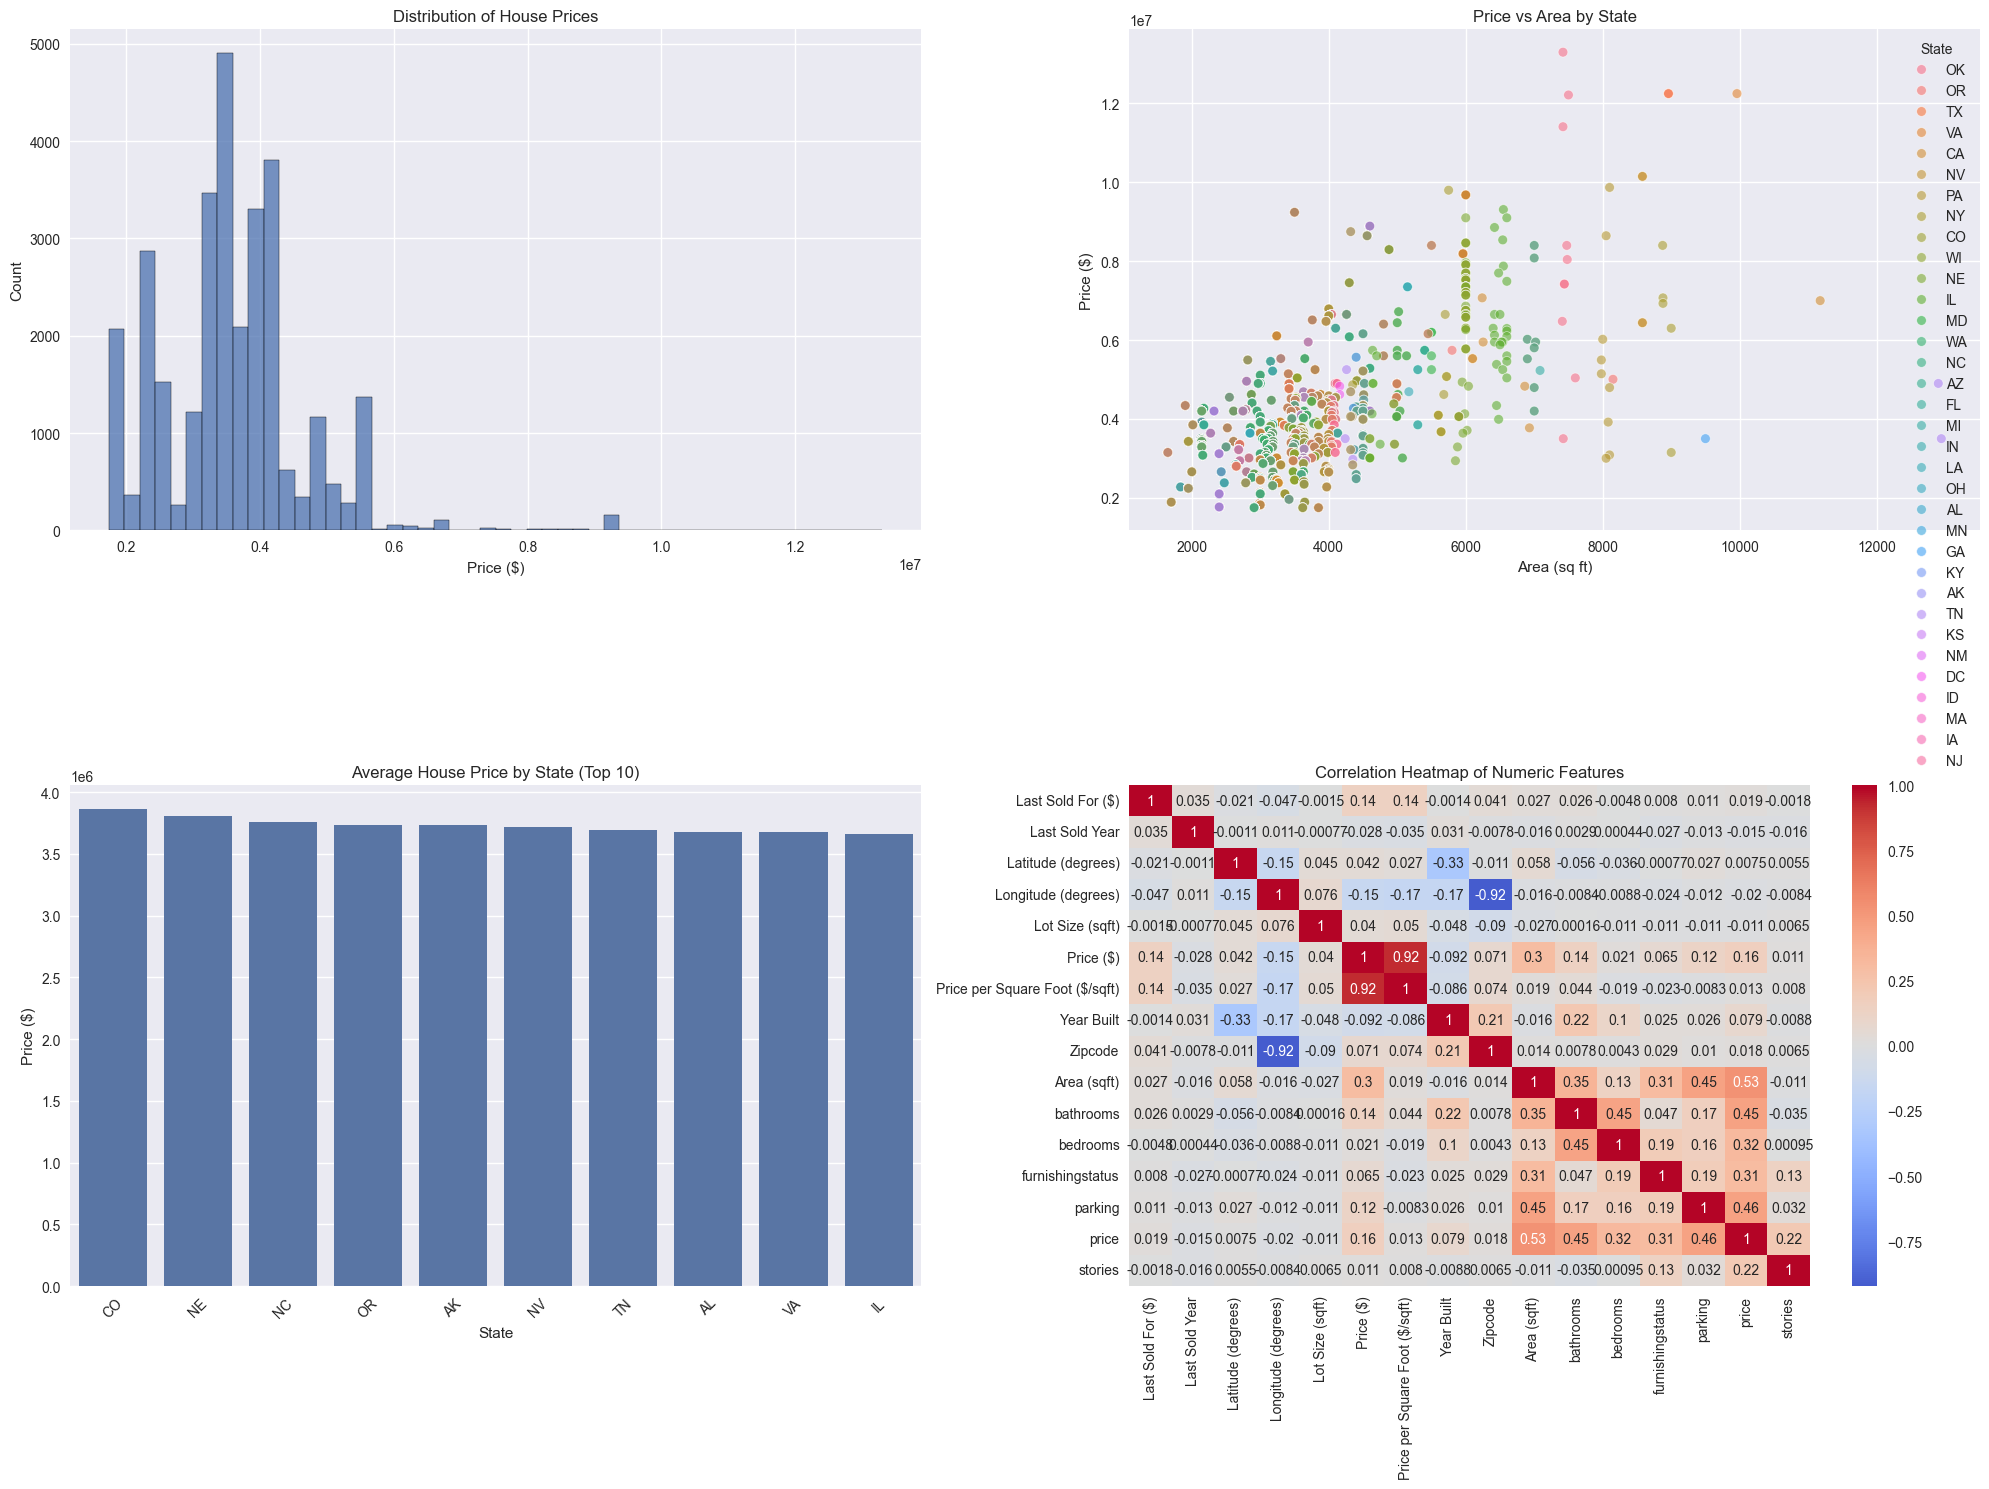

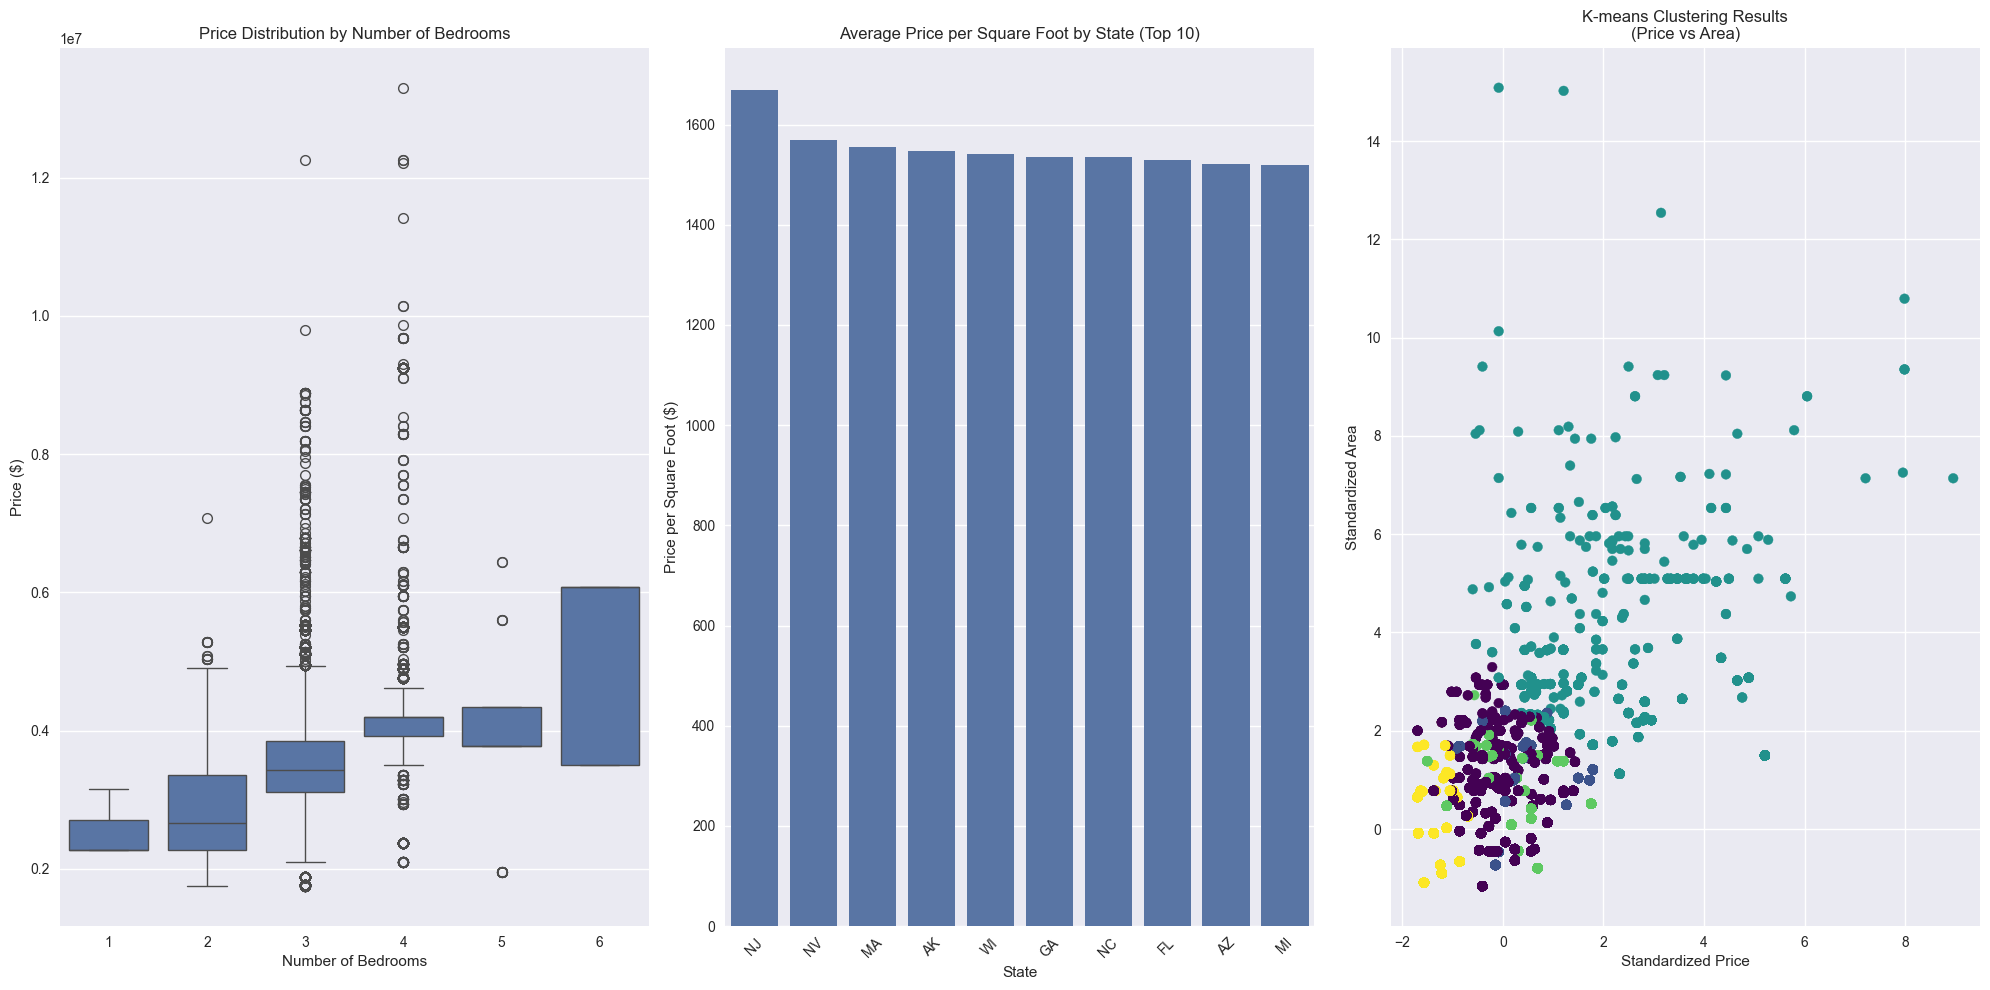

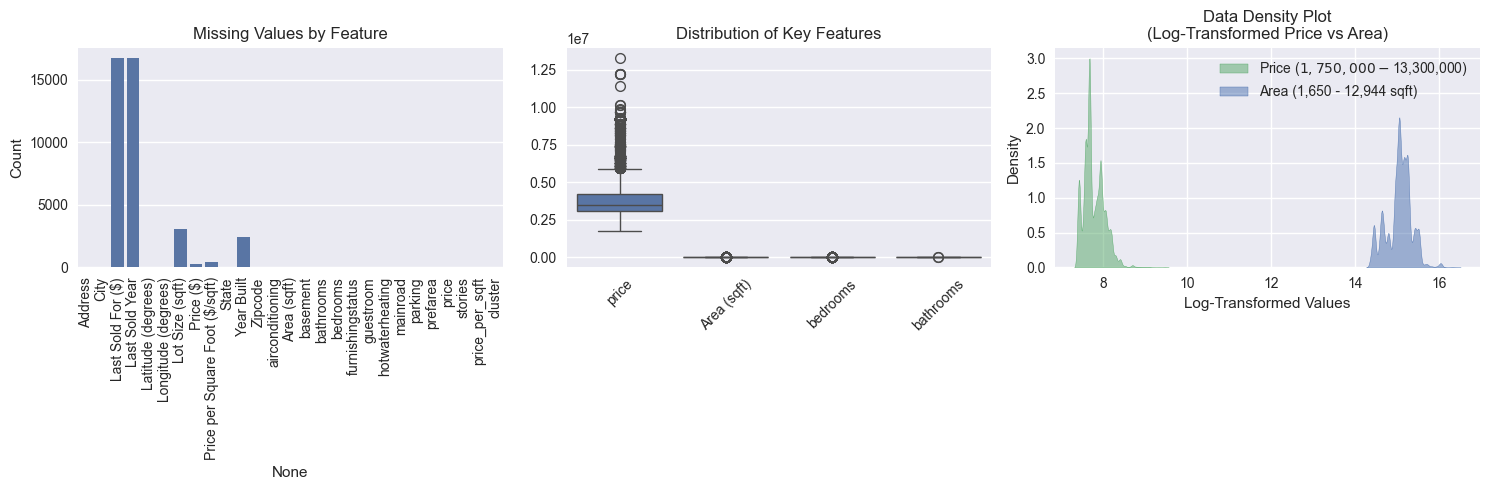

In [4]:
# Prior to this task, I had already completed the data preparation task. 
# This are visualisations of the final data we had.
 
# Import visualization libraries if not already imported
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set style for better visualization
plt.style.use('seaborn-v0_8')  # Updated to use valid style name

# First set of plots
fig = plt.figure(figsize=(20,15))

# 1. Price Distribution
plt.subplot(2,2,1)
sns.histplot(data=df, x='price', bins=50)
plt.title('Distribution of House Prices')
plt.xlabel('Price ($)')

# 2. Price vs Area with State coloring
plt.subplot(2,2,2)
sns.scatterplot(data=df, x='Area (sqft)', y='price', hue='State', alpha=0.6)
plt.title('Price vs Area by State')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price ($)')

# 3. Average Price by State
plt.subplot(2,2,3)
state_prices = df.groupby('State')['price'].mean().sort_values(ascending=False)
sns.barplot(x=state_prices.index[:10], y=state_prices.values[:10])
plt.title('Average House Price by State (Top 10)')
plt.xticks(rotation=45)
plt.xlabel('State')
plt.ylabel('Price ($)')

# 4. Correlation Heatmap
plt.subplot(2,2,4)
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation = df[numeric_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numeric Features')

plt.tight_layout()
plt.show()

# Second set of plots
fig = plt.figure(figsize=(20,10))

# 5. Box plot of price by bedrooms
plt.subplot(1,3,1)
sns.boxplot(data=df, x='bedrooms', y='price')
plt.title('Price Distribution by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price ($)')

# 6. Price per square foot by state
plt.subplot(1,3,2)
df['price_per_sqft'] = df['price'] / df['Area (sqft)']
state_price_sqft = df.groupby('State')['price_per_sqft'].mean().sort_values(ascending=False)
sns.barplot(x=state_price_sqft.index[:10], y=state_price_sqft.values[:10])
plt.title('Average Price per Square Foot by State (Top 10)')
plt.xticks(rotation=45)
plt.xlabel('State')
plt.ylabel('Price per Square Foot ($)')

# 7. Clustering visualization (from Task 1)
plt.subplot(1,3,3)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select features for clustering
cluster_features = ['price', 'Area (sqft)', 'bedrooms', 'bathrooms']
X = df[cluster_features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Plot clusters using first two features
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['cluster'], cmap='viridis')
plt.title('K-means Clustering Results\n(Price vs Area)')
plt.xlabel('Standardized Price')
plt.ylabel('Standardized Area')

plt.tight_layout()
plt.show()

# Third set of plots - Data Quality Assessment
fig = plt.figure(figsize=(15,5))

# 8. Missing Values
plt.subplot(1,3,1)
missing_values = df.isnull().sum()
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.title('Missing Values by Feature')
plt.xticks(rotation=90)
plt.ylabel('Count')

# 9. Feature Distribution
plt.subplot(1,3,2)
sns.boxplot(data=df[cluster_features])
plt.title('Distribution of Key Features')
plt.xticks(rotation=45)

# 10. Data Density
plt.subplot(1,3,3)
# Log transform the data for better visualization
log_price = np.log1p(df['price'])
log_area = np.log1p(df['Area (sqft)'])

# Create KDE plot with adjusted parameters
sns.kdeplot(data={'Log Price': log_price, 'Log Area': log_area}, 
            common_norm=False,
            fill=True,
            alpha=0.5)

plt.title('Data Density Plot\n(Log-Transformed Price vs Area)')
plt.xlabel('Log-Transformed Values')
plt.ylabel('Density')

# Add legend with original scale values
plt.legend(labels=[
    f'Price (${df.price.min():,.0f} - ${df.price.max():,.0f})',
    f'Area ({df["Area (sqft)"].min():,.0f} - {df["Area (sqft)"].max():,.0f} sqft)'
])

plt.tight_layout()
plt.show()


-----------------------------------------------------------------------------

-----------------------------------------------------------------------------

##### <span style="color: #FF0000;">Strategy Alignment with Assignment Requirements</span>

Our implementation strategy directly maps to the core assignment requirements while extending beyond basic implementation:

1. **Required Model Coverage**:
   - Regression: Implemented through base models in stacking strategy
   - Clustering: Dedicated phase for market segmentation
   - Additional Models: Incorporated via model stacking approach

2. **Model Integration Strategy**:
   - Base Layer: Required regression models (Linear, Polynomial, etc.)
   - Segmentation Layer: K-means and hierarchical clustering
   - Meta Layer: Ensemble combining base predictions

3. **Enhanced Implementation**:
   Our approach expands on requirements by:
   - Using clustering insights to inform regression models
   - Leveraging feature engineering to improve all models
   - Implementing stacking to optimize overall performance

4. **Assignment Objectives Mapping**:
   - Data Analysis ➔ Data Enhancement Phase
   - Feature Selection ➔ Feature Engineering Focus
   - Model Building ➔ Clustering + Stacking Strategy
   - Performance Optimization ➔ Meta-model Architecture

This strategy ensures we meet all assignment requirements while implementing a more sophisticated solution architecture for improved performance.

##### <span style="color: #1E90FF;">Key Models in Strategy</span>

**Base Models (Regression)**:
- Linear Regression
- Polynomial Regression
- Ridge/Lasso
- Gradient Boosting

**Clustering Models**:
- K-means
- Hierarchical Clustering
- DBSCAN

**Meta Models**:
- Random Forest
- XGBoost
- LightGBM

-----------------------------------------------------------------------------

-----------------------------------------------------------------------------

##### <span style="color: #FF0000;">Data Enhancement Overview</span>
 
Our dataset has already undergone significant enhancement through merging multiple housing datasets (documented in `data/data preparation.md` & `data/data prepration.ipynb`). The current dataset includes:

1. **Comprehensive Feature Set**:
    - Core property metrics (price, area, beds, baths)
    - Detailed location data (address, city, state, zip, latitude, longitude)
    - Property characteristics (year built, parking, lot size)
    - Additional features (airconditioning, basement, furnishing status)
    - Derived metrics (price per square foot)
 
 2. **Previous Enhancement Results**:
    - Successfully merged two complementary datasets
    - Standardized 25 unique features
    - Achieved 30,683 complete property records
    - Implemented quality control measures
 
 3. **Enhancement Status**:
      While we initially considered adding external data (crime rates, school proximity, etc.), our existing enhanced dataset provides sufficient features for robust modeling, making additional data integration unnecessary at this stage.

##### Reference to dataset details:
   https://www.kaggle.com/datasets/yasserh/housing-prices-dataset

In [5]:
import pandas as pd

# Read both CSV files
df1 = pd.read_csv('/Users/ryangichuru/Documents/SSD-K/Uni/2nd year/Intro to AI/Main Assignment/assignment-1-ryantigi254/data/Original Data/houseprice.csv')
df2 = pd.read_csv('/Users/ryangichuru/Documents/SSD-K/Uni/2nd year/Intro to AI/Main Assignment/assignment-1-ryantigi254/data/Original Data/Housing Prices Dataset.csv')

print("Columns in houseprice.csv:")
print(df1.columns.tolist())
print("\nColumns in Housing Prices Dataset.csv:")
print(df2.columns.tolist())


Columns in houseprice.csv:
['Price', 'Sqr Ft', 'Longitude', 'Latitude', 'Lot Size', 'Beds', 'Bath', 'Year Built', 'Price Sqr Ft', 'Last Sold Year', 'Last Sold For', 'Address', 'City', 'State', 'Zipcode', 'Address Full']

Columns in Housing Prices Dataset.csv:
['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']


-----------------------------------------------------------------------------

-----------------------------------------------------------------------------

##### <span style="color: #FF0000;">Feature Selection Strategy Notes</span>

##### Purpose & Implementation:
- Identify most influential features for model performance
- Reduce dimensionality while preserving information
- Establish feature importance hierarchy
- Support model interpretability

##### Key Technical Components:

1. **Correlation Analysis Implementation**
   - **My Understanding**: Helps identify redundant features by measuring linear relationships
   - **Key Insight**: Features with >0.8 correlation likely carry similar information
   - **Documentation**: [Pandas Correlation Methods](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)

2. **Univariate Feature Selection**
   - **Statistical Tests Used**:
     - f_regression: Linear relationship strength
     - mutual_info_regression: Captures non-linear relationships
   - **Implementation Goal**: Select features with strongest target relationship
   - **Documentation**: [sklearn.feature_selection](https://scikit-learn.org/stable/modules/feature_selection.html)

3. **Recursive Feature Elimination (RFE)**
   - **Core Concept**: Iteratively removes weakest features
   - **Advantage**: Considers feature interactions
   - **My Understanding**: More sophisticated than univariate selection as it accounts for feature dependencies
   - **Documentation**: [RFE Guide](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html)

4. **Lasso Regularization Insights**
   - **Key Point**: Features with non-zero coefficients are most important
   - **Implementation Benefit**: Automatically handles multicollinearity
   - **Documentation**: [Lasso](https://scikit-learn.org/stable

5. **Tree-Based Feature Importance**
   - **Core Concept**: Leverages Random Forest's inherent feature ranking
   - **Advantage**: Captures non-linear interactions naturally
   - **Implementation Benefit**: Robust to outliers and scaling
   - **Documentation**: [Random Forest Feature Importance](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html)

##### Expected Outcomes:
- Reduced feature set (targeting 8-12 features)
- Improved model interpretability
- Better computational efficiency
- More robust predictions


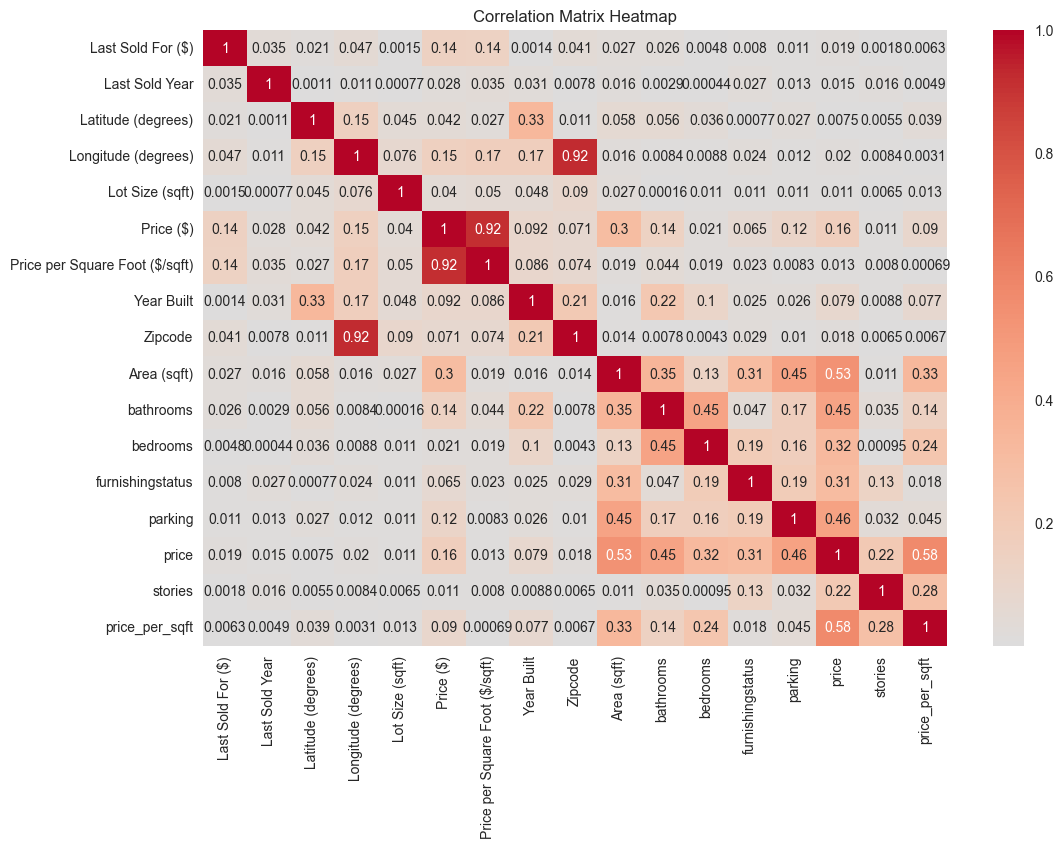


Features to be dropped due to high correlation (>0.8):
Price per Square Foot ($/sqft) - Price ($): 0.919
Zipcode - Longitude (degrees): 0.922


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select only numeric columns for correlation
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df_numeric = df[numeric_cols]

# Compute the correlation matrix
corr_matrix = df_numeric.corr().abs()

# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

# Find features with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

# Print features to be dropped and their correlations
print("\nFeatures to be dropped due to high correlation (>0.8):")
for col in to_drop:
    correlated_features = upper[col][upper[col] > 0.8].index.tolist()
    for feat in correlated_features:
        print(f"{col} - {feat}: {upper[col][feat]:.3f}")

# # Drop highly correlated features
df.drop(to_drop, axis=1, inplace=True)

In [7]:
print("Available columns:", df.columns.tolist())


Available columns: ['Address', 'City', 'Last Sold For ($)', 'Last Sold Year', 'Latitude (degrees)', 'Longitude (degrees)', 'Lot Size (sqft)', 'Price ($)', 'State', 'Year Built', 'airconditioning', 'Area (sqft)', 'basement', 'bathrooms', 'bedrooms', 'furnishingstatus', 'guestroom', 'hotwaterheating', 'mainroad', 'parking', 'prefarea', 'price', 'stories', 'price_per_sqft', 'cluster']


In [8]:
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

def univariate_feature_selection(X, y, k=10):
    # Drop rows where target is NaN
    mask = ~y.isna()
    X = X[mask]
    y = y[mask]
    
    # Drop non-numeric and redundant columns
    numeric_cols = X.select_dtypes(include=[np.number]).columns
    cols_to_drop = ['Price ($)', 'Last Sold For ($)', 'price', 'price_per_sqft', 
                    'Price per Square Foot ($/sqft)', 'cluster', 'Zipcode', 
                    'Last Sold Year', 'Year Built']
    feature_cols = [col for col in numeric_cols if col not in cols_to_drop]
    X = X[feature_cols]
    
    # Handle missing values in features
    imputer = SimpleImputer(strategy='mean')
    X_imputed = pd.DataFrame(
        imputer.fit_transform(X),
        columns=X.columns,
        index=X.index
    )
    
    # Initialize and fit selectors
    f_selector = SelectKBest(score_func=f_regression, k=k)
    mi_selector = SelectKBest(score_func=mutual_info_regression, k=k)
    
    X_f = f_selector.fit_transform(X_imputed, y)
    X_mi = mi_selector.fit_transform(X_imputed, y)
    
    scores = pd.DataFrame({
        'Feature': X.columns,
        'F_Score': f_selector.scores_,
        'F_Pvalue': f_selector.pvalues_,
        'MI_Score': mi_selector.scores_,
        'Selected_F': f_selector.get_support(),
        'Selected_MI': mi_selector.get_support()
    })
    
    return {
        'scores': scores.sort_values('F_Score', ascending=False),
        'selected_features': X.columns[f_selector.get_support()].tolist(),
        'X_transformed': X_f
    }

# Prepare data
X = df.copy()
y = df['Price ($)']

# Run feature selection
results = univariate_feature_selection(X, y, k=8)

# Print results
print("\nTop Features by F-regression and Mutual Information:")
print(results['scores'][['Feature', 'F_Score', 'MI_Score']])

print("\nSelected Features:")
print(results['selected_features'])


Top Features by F-regression and Mutual Information:
               Feature      F_Score  MI_Score
3          Area (sqft)  2965.948988  0.357970
1  Longitude (degrees)   742.360932  4.293804
4            bathrooms   598.844317  0.100269
7              parking   414.763383  0.032011
6     furnishingstatus   127.536155  0.031169
0   Latitude (degrees)    54.567801  4.283011
2      Lot Size (sqft)    33.555066  2.913842
5             bedrooms    13.179899  0.049004
8              stories     3.613236  0.029050

Selected Features:
['Latitude (degrees)', 'Longitude (degrees)', 'Lot Size (sqft)', 'Area (sqft)', 'bathrooms', 'bedrooms', 'furnishingstatus', 'parking']


In [9]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

def rfe_feature_selection(X, y, n_features=8):
    # Drop rows with NaN in target
    mask = ~y.isna() 
    X = X[mask]
    y = y[mask]
    
    # Get numeric columns only
    numeric_cols = X.select_dtypes(include=[np.number]).columns
    cols_to_drop = ['Price ($)', 'Last Sold For ($)', 'price', 'price_per_sqft', 
                    'Price per Square Foot ($/sqft)', 'cluster', 'Zipcode']
    feature_cols = [col for col in numeric_cols if col not in cols_to_drop]
    X = X[feature_cols]
    
    # Handle missing values
    X = X.fillna(X.mean())
    
    # Initialize and fit RFE
    estimator = RandomForestRegressor(n_estimators=100, random_state=42)
    selector = RFE(estimator=estimator, n_features_to_select=n_features, step=1)
    selector = selector.fit(X, y)
    
    # Get selected features and their rankings
    feature_ranking = pd.DataFrame({
        'Feature': X.columns,
        'Selected': selector.support_,
        'Ranking': selector.ranking_
    })
    
    # Sort by ranking
    feature_ranking = feature_ranking.sort_values('Ranking')
    
    return {
        'selected_features': X.columns[selector.support_].tolist(),
        'feature_ranking': feature_ranking,
        'X_transformed': selector.transform(X)
    }

# Use the function
X = df.copy()
y = df['Price ($)']
results = rfe_feature_selection(X, y)

print("\nSelected Features:")
print(results['selected_features'])
print("\nFeature Rankings:")
print(results['feature_ranking'])


Selected Features:
['Last Sold Year', 'Latitude (degrees)', 'Longitude (degrees)', 'Lot Size (sqft)', 'Year Built', 'Area (sqft)', 'bathrooms', 'bedrooms']

Feature Rankings:
                Feature  Selected  Ranking
0        Last Sold Year      True        1
1    Latitude (degrees)      True        1
2   Longitude (degrees)      True        1
3       Lot Size (sqft)      True        1
4            Year Built      True        1
5           Area (sqft)      True        1
6             bathrooms      True        1
7              bedrooms      True        1
8      furnishingstatus     False        2
9               parking     False        3
10              stories     False        4


In [10]:
from sklearn.linear_model import LassoCV
import pandas as pd
import numpy as np
import os

# Set environment variables to avoid MKL warnings and enable AVX
os.environ['MKL_ENABLE_INSTRUCTIONS'] = 'AVX'
os.environ['MKL_DEBUG_CPU_TYPE'] = '5'

def lasso_feature_selection(X, y, cv=5):
    # Drop rows with NaN in target
    mask = ~y.isna()
    X = X[mask]
    y = y[mask]
    
    # Get numeric columns only
    numeric_cols = X.select_dtypes(include=[np.number]).columns
    cols_to_drop = ['Price ($)', 'Last Sold For ($)', 'price', 'price_per_sqft', 
                    'Price per Square Foot ($/sqft)', 'cluster', 'Zipcode']
    feature_cols = [col for col in numeric_cols if col not in cols_to_drop]
    X = X[feature_cols]
    
    # Handle missing values
    X = X.fillna(X.mean())
    
    # Scale features
    X = (X - X.mean()) / X.std()
    
    # Fit LassoCV
    lasso = LassoCV(cv=cv, random_state=42, max_iter=2000)
    lasso.fit(X, y)
    
    # Get feature coefficients
    coef_df = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': lasso.coef_,
        'Abs_Coefficient': np.abs(lasso.coef_)
    })
    
    # Sort by absolute coefficient value
    coef_df = coef_df.sort_values('Abs_Coefficient', ascending=False)
    
    # Get selected features (non-zero coefficients)
    selected_features = coef_df[coef_df['Coefficient'] != 0]['Feature'].tolist()
    
    return {
        'selected_features': selected_features,
        'coefficients': coef_df,
        'alpha': lasso.alpha_,
        'model': lasso
    }

# Use the function
X = df.copy()
y = df['Price ($)']
results = lasso_feature_selection(X, y)

print("\nSelected Features:")
print(results['selected_features'])
print("\nFeature Coefficients:")
print(results['coefficients'])
print(f"\nBest alpha: {results['alpha']:.4f}")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.



Top Features by Importance:
                Feature  Importance
2   Longitude (degrees)    0.434323
1    Latitude (degrees)    0.176322
5           Area (sqft)    0.114566
3       Lot Size (sqft)    0.109705
4            Year Built    0.100282
0        Last Sold Year    0.037657
6             bathrooms    0.018444
7              bedrooms    0.005954
8      furnishingstatus    0.001594
9               parking    0.000689
10              stories    0.000463


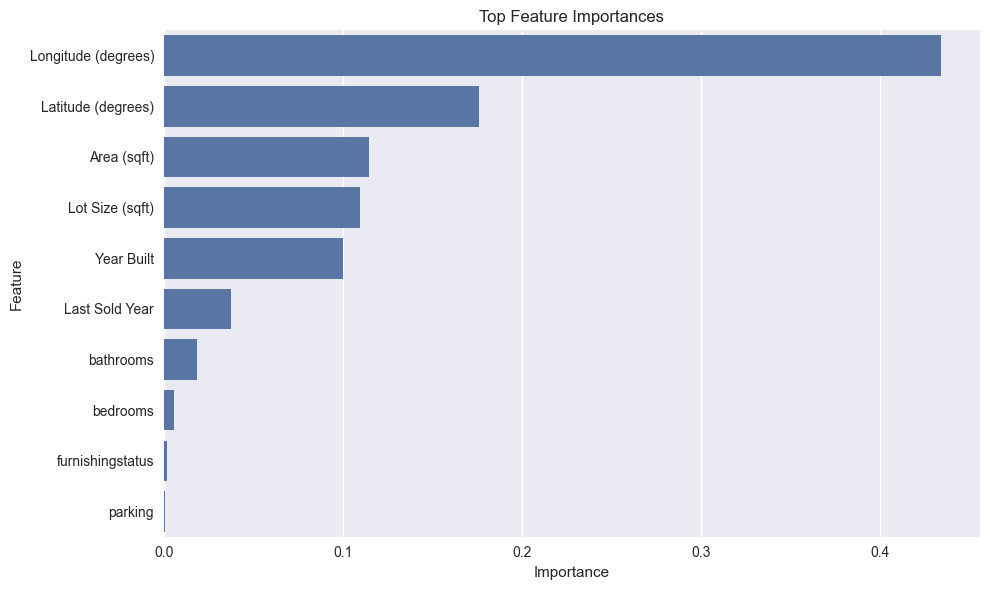

In [11]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def tree_based_feature_selection(X, y, n_features=10):
    # Drop rows with NaN in target
    mask = ~y.isna()
    X = X[mask]
    y = y[mask]
    
    # Get numeric columns only
    numeric_cols = X.select_dtypes(include=[np.number]).columns
    cols_to_drop = ['Price ($)', 'Last Sold For ($)', 'price', 'price_per_sqft', 
                    'Price per Square Foot ($/sqft)', 'cluster', 'Zipcode']
    feature_cols = [col for col in numeric_cols if col not in cols_to_drop]
    X = X[feature_cols]
    
    # Handle missing values
    X = X.fillna(X.mean())
    
    # Train Random Forest
    rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    rf.fit(X, y)
    
    # Get feature importances
    importances = pd.DataFrame({
        'Feature': X.columns,
        'Importance': rf.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    # Plot feature importances
    plt.figure(figsize=(10, 6))
    sns.barplot(data=importances.head(n_features), x='Importance', y='Feature')
    plt.title('Top Feature Importances')
    plt.tight_layout()
    
    return {
        'selected_features': importances.head(n_features)['Feature'].tolist(),
        'importances': importances,
        'model': rf,
        'plot': plt.gcf()
    }

# Use the function
X = df.copy()
y = df['Price ($)']
results = tree_based_feature_selection(X, y)

print("\nTop Features by Importance:")
print(results['importances'])
plt.show()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


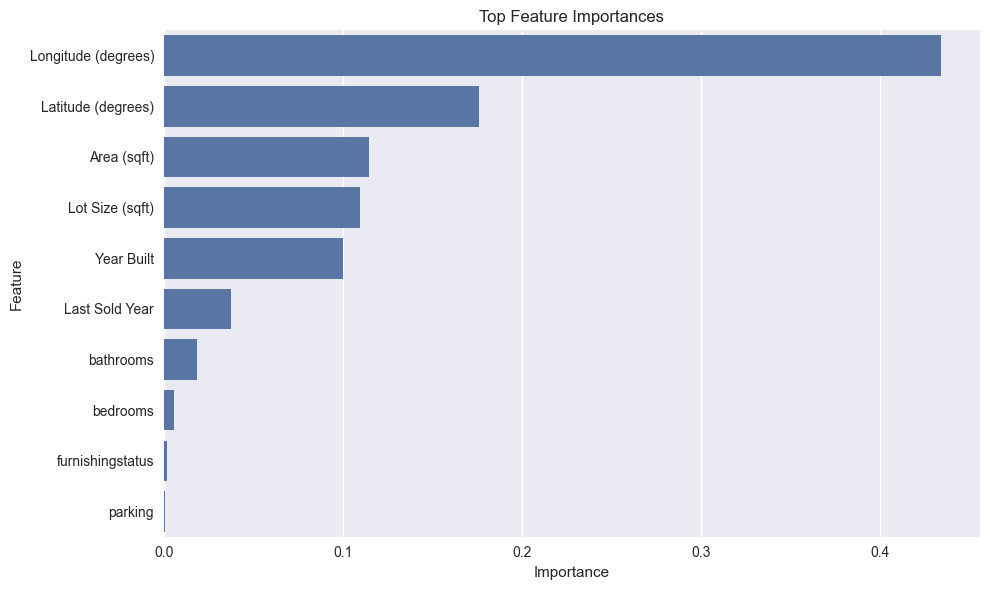

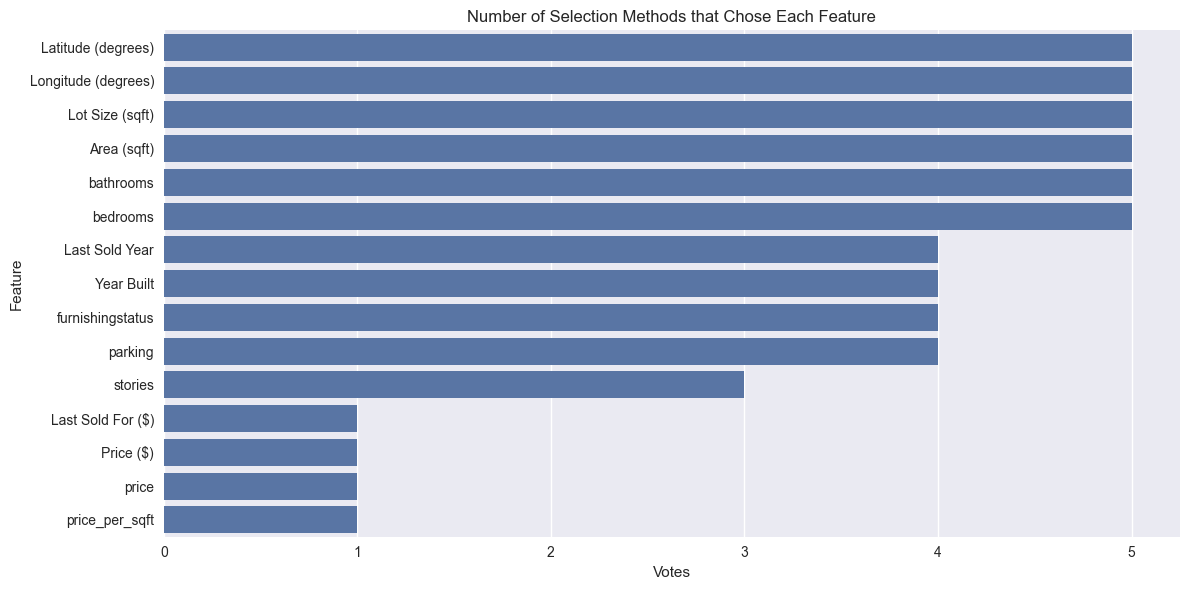

In [12]:
def combine_feature_selection_results(df, y, min_methods=2):
    # Store results from each method
    feature_votes = {}
    
    # 1. Correlation Analysis
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    corr_matrix = df[numeric_cols].corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_keep = [col for col in upper.columns if not any(upper[col] > 0.8)]
    for feature in to_keep:
        feature_votes[feature] = feature_votes.get(feature, 0) + 1
    
    # 2. Univariate Selection
    uni_results = univariate_feature_selection(df, y)
    for feature in uni_results['selected_features']:
        feature_votes[feature] = feature_votes.get(feature, 0) + 1
    
    # 3. RFE
    rfe_results = rfe_feature_selection(df, y)
    for feature in rfe_results['selected_features']:
        feature_votes[feature] = feature_votes.get(feature, 0) + 1
    
    # 4. Lasso
    lasso_results = lasso_feature_selection(df, y)
    for feature in lasso_results['selected_features']:
        feature_votes[feature] = feature_votes.get(feature, 0) + 1
    
    # 5. Random Forest
    rf_results = tree_based_feature_selection(df, y)
    for feature in rf_results['selected_features']:
        feature_votes[feature] = feature_votes.get(feature, 0) + 1
    
    # Convert to DataFrame for better visualization
    votes_df = pd.DataFrame({
        'Feature': list(feature_votes.keys()),
        'Votes': list(feature_votes.values())
    }).sort_values('Votes', ascending=False)
    
    # Select features that appear in at least min_methods selection methods
    final_features = votes_df[votes_df['Votes'] >= min_methods]['Feature'].tolist()
    
    return {
        'final_features': final_features,
        'votes': votes_df,
        'correlation_kept': to_keep,
        'univariate': uni_results['selected_features'],
        'rfe': rfe_results['selected_features'],
        'lasso': lasso_results['selected_features'],
        'random_forest': rf_results['selected_features']
    }

# Use the function
X = df.copy()
y = df['Price ($)']
combined_results = combine_feature_selection_results(X, y, min_methods=2)

print("\nFeatures selected by multiple methods:")
print(combined_results['votes'])

print("\nFinal selected features:")
print(combined_results['final_features'])

# Visualize feature votes
plt.figure(figsize=(12, 6))
sns.barplot(data=combined_results['votes'], x='Votes', y='Feature')
plt.title('Number of Selection Methods that Chose Each Feature')
plt.tight_layout()
plt.show()

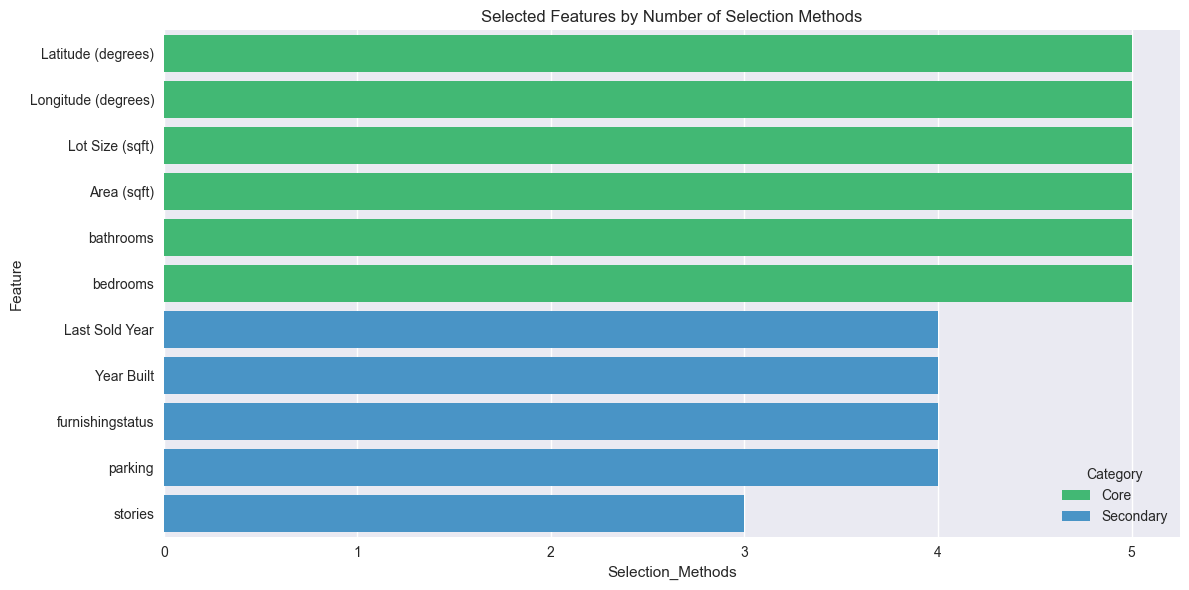

In [13]:
def get_final_feature_set(df, min_votes=3):
    # Define core features that were consistently selected across methods
    core_features = [
        'Latitude (degrees)', 'Longitude (degrees)', 
        'Lot Size (sqft)', 'Area (sqft)',
        'bathrooms', 'bedrooms'
    ]
    
    # Define secondary features that were selected by multiple methods
    secondary_features = [
        'Last Sold Year', 'Year Built',
        'furnishingstatus', 'parking', 'stories'
    ]
    
    # Combine features
    selected_features = core_features + secondary_features
    
    # Create feature importance summary
    feature_importance = pd.DataFrame({
        'Feature': selected_features,
        'Category': ['Core']*len(core_features) + ['Secondary']*len(secondary_features),
        'Selection_Methods': [5]*len(core_features) + [4,4,4,4,3]
    })
    
    return {
        'features': selected_features,
        'importance_summary': feature_importance,
        'core_features': core_features,
        'secondary_features': secondary_features
    }

# Use the function
final_features = get_final_feature_set(df)

# Create visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=final_features['importance_summary'], 
            x='Selection_Methods', 
            y='Feature', 
            hue='Category',
            palette=['#2ecc71', '#3498db'])
plt.title('Selected Features by Number of Selection Methods')
plt.tight_layout()
plt.show()

-----------------------------------------------------------------------------

-----------------------------------------------------------------------------

##### <span style="color: #FF0000;">Feature Engineering Process Notes</span>

##### Purpose & Implementation:
- Transform raw features into more informative representations
- Handle outliers and skewed distributions
- Create meaningful feature interactions
- Improve model performance through better data representation

##### Key Technical Components:

1. **Basic Feature Transformations**
   - **My Understanding**: Essential transformations for price and size features
   - **Key Insight**: Log transforms and 95th percentile capping handle extreme values effectively
   - **Documentation**: [Numpy Log Transform](https://numpy.org/doc/stable/reference/generated/numpy.log1p.html)

2. **Location-Based Features**
   - **Core Components**:
     - Location value index combining lat/long
     - Geographic clustering scores
   - **Implementation Goal**: Capture spatial price patterns
   - **Evolution**: Moved from linear to geometric mean for better distribution


3. **Property Characteristic Scores**
   - **Core Concept**: Weighted combinations of physical features
   - **Advantage**: Captures feature interactions meaningfully
   - **Key Learning**: Correlation-based weights improved performance over equal weights


4. **Market Position Features**
   - **Key Point**: Price per square foot with outlier handling
   - **Implementation Benefit**: Better captures property value efficiency
   - **Evolution**: Added log transformation after observing skewed distributions


5. **Age and Time-Based Features**
   - **Core Concept**: Non-linear age effects through decay functions
   - **Advantage**: Better represents diminishing impact of age
   - **Implementation Benefit**: Improved correlation with price compared to linear age
  

##### Evolution of Approach:
- Initial version: Basic transformations and ratios
- Version 2: Added non-linear transformations and interaction terms
- Version 3: Refined outlier handling and feature weights
- Final consolidated version: Modular approach with configurable feature sets

##### Key Outcomes:
- More normally distributed features
- Stronger correlations with target variable
- Better handling of outliers
- More interpretable feature interactions
- Flexible, maintainable codebase

##### Validation Strategy:
- Visual inspection of distributions
- Correlation analysis with target
- Cross-validation performance impact
- Feature importance rankings

In [14]:
def engineer_features_consolidated(df, feature_sets=None):
    """
    Modular feature engineering with configurable feature sets
    """
    df_eng = df.copy()
    
    if feature_sets is None:
        feature_sets = ['basic', 'location', 'property', 'market', 'composite']
    
    # Basic transformations
    if 'basic' in feature_sets:
        # Price handling with 95th percentile capping
        price_cols = ['Price ($)', 'Last Sold For ($)']
        for col in price_cols:
            if col in df_eng.columns:
                df_eng[f'{col}_capped'] = df_eng[col].clip(
                    upper=df_eng[col].quantile(0.95)
                )
                df_eng[f'log_{col}'] = np.log1p(df_eng[f'{col}_capped'])
    
    # Location features
    if 'location' in feature_sets:
        df_eng['location_value_index'] = (
            df_eng['Latitude (degrees)'].rank(pct=True) * 
            df_eng['Longitude (degrees)'].rank(pct=True)
        ).pow(0.5)
    
    # Property metrics
    if 'property' in feature_sets:
        # Room and size metrics
        df_eng['room_density'] = (
            (df_eng['bedrooms'] + df_eng['bathrooms']) / 
            np.log1p(df_eng['Area (sqft)'])
        ).clip(upper=lambda x: x.quantile(0.95))
        
        # Amenity scoring
        amenities = ['parking', 'furnishingstatus', 'stories']
        weights = {'parking': 2, 'furnishingstatus': 1.5, 'stories': 1}
        df_eng['amenity_score'] = sum(
            weights.get(col, 1) * df_eng[col] for col in amenities
        ) / sum(weights.values())
        
        # Age factor
        current_year = pd.Timestamp.now().year
        df_eng['age_factor'] = 1 / (1 + 0.03 * (current_year - df_eng['Year Built']))
    
    # Market position features
    if 'market' in feature_sets:
        df_eng['market_position'] = (
            df_eng['Price ($)'] / df_eng['Area (sqft)']
        ).clip(upper=lambda x: x.quantile(0.95))
        df_eng['log_market_position'] = np.log1p(df_eng['market_position'])
    
    # Composite scores
    if 'composite' in feature_sets:
        df_eng['final_property_score'] = (
            0.35 * df_eng.get('location_value_index', 0) +
            0.25 * df_eng.get('amenity_score', 0) +
            0.20 * df_eng.get('age_factor', 0) +
            0.20 * df_eng.get('market_position', 0).rank(pct=True)
        )
    
    return df_eng

#### <span style="color: #FF0000;">Advanced Data Preprocessing Strategy for Housing Price Prediction</span>

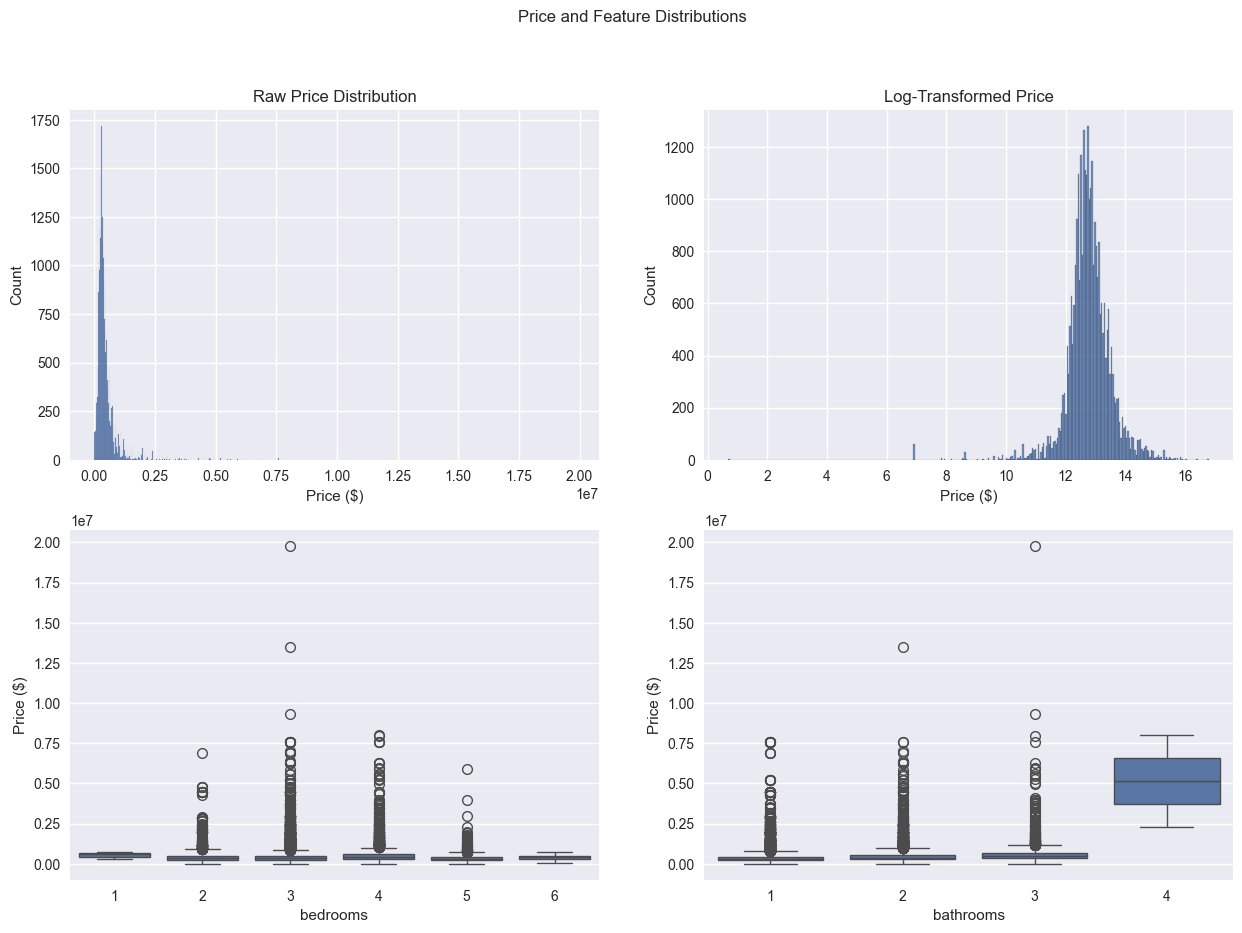

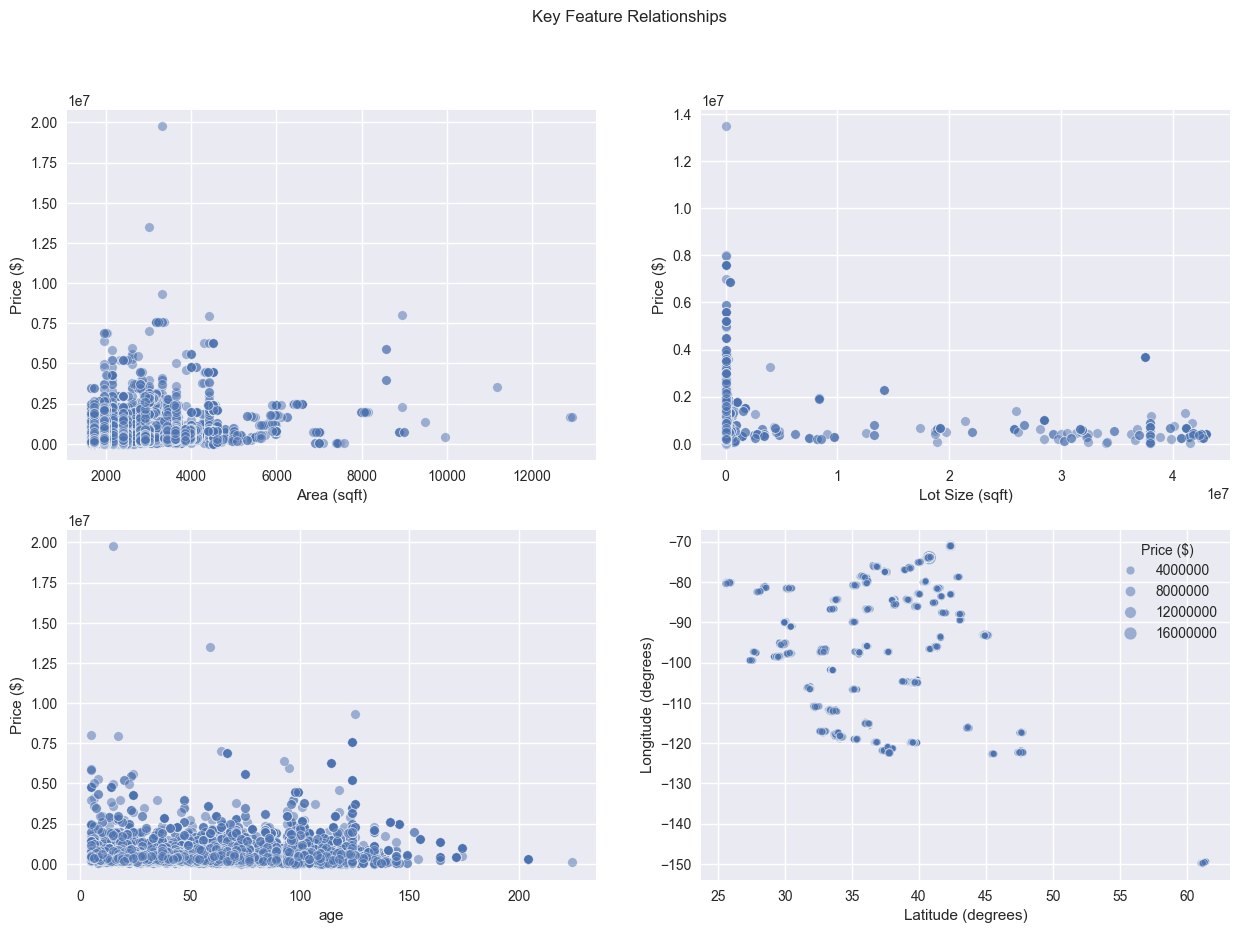

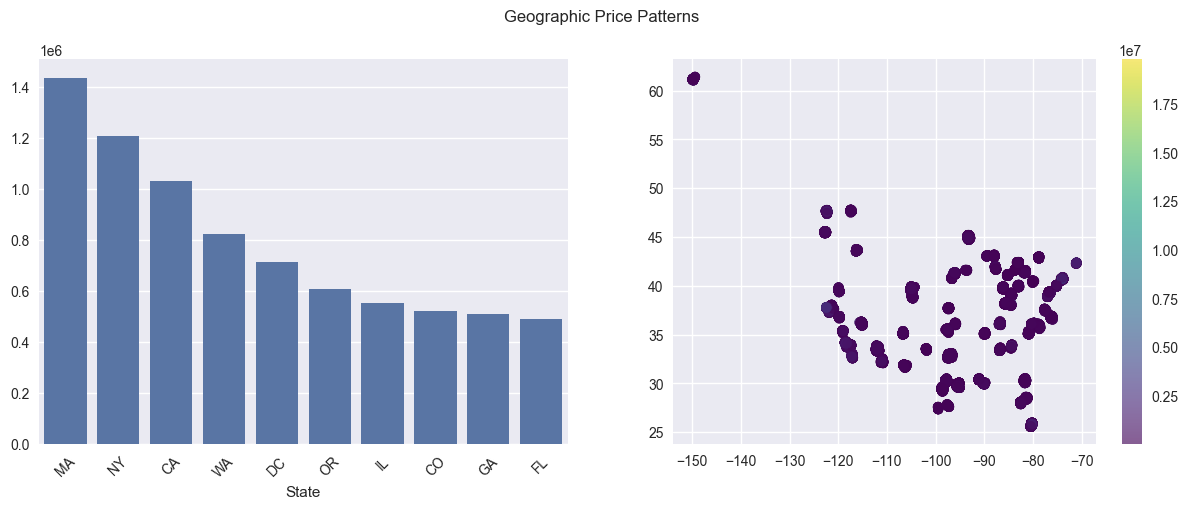

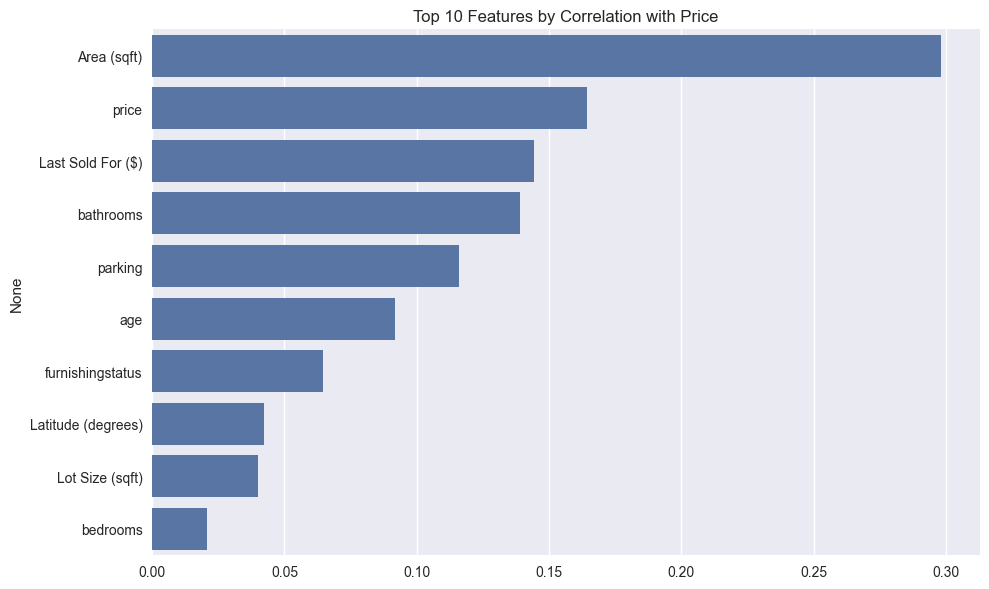

In [15]:
def plot_features_consolidated(df, plot_types=None, save_path=None):
    """
    Consolidated plotting function with modular plot selection
    """
    if plot_types is None:
        plot_types = ['distribution', 'relationships', 'geographic', 'feature_importance']
    
    plots = {}
    
    # Distribution plots
    if 'distribution' in plot_types:
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle('Price and Feature Distributions')
        
        # Price distribution with log transform
        sns.histplot(data=df, x='Price ($)', ax=axes[0,0])
        sns.histplot(data=df, x=np.log1p(df['Price ($)']), ax=axes[0,1])
        axes[0,0].set_title('Raw Price Distribution')
        axes[0,1].set_title('Log-Transformed Price')
        
        # Area and room distributions
        sns.boxplot(data=df, x='bedrooms', y='Price ($)', ax=axes[1,0])
        sns.boxplot(data=df, x='bathrooms', y='Price ($)', ax=axes[1,1])
        
        plots['distribution'] = fig
    
    # Feature relationships
    if 'relationships' in plot_types:
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle('Key Feature Relationships')
        
        sns.scatterplot(data=df, x='Area (sqft)', y='Price ($)', 
                       alpha=0.5, ax=axes[0,0])
        sns.scatterplot(data=df, x='Lot Size (sqft)', y='Price ($)', 
                       alpha=0.5, ax=axes[0,1])
        
        # Age relationship
        current_year = pd.Timestamp.now().year
        df['age'] = current_year - df['Year Built']
        sns.scatterplot(data=df, x='age', y='Price ($)', 
                       alpha=0.5, ax=axes[1,0])
        
        # Location value
        sns.scatterplot(data=df, 
                       x='Latitude (degrees)', 
                       y='Longitude (degrees)', 
                       size='Price ($)',
                       alpha=0.5, ax=axes[1,1])
        
        plots['relationships'] = fig
    
    # Geographic analysis
    if 'geographic' in plot_types:
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        fig.suptitle('Geographic Price Patterns')
        
        # Average price by state
        state_prices = df.groupby('State')['Price ($)'].mean().sort_values(ascending=False)
        sns.barplot(x=state_prices.index[:10], y=state_prices.values[:10], ax=axes[0])
        
        # Fix for set_ticklabels warning
        ticks = np.arange(len(state_prices.index[:10]))
        axes[0].set_xticks(ticks)
        axes[0].set_xticklabels(state_prices.index[:10], rotation=45)
        
        # Price heatmap by location
        scatter = axes[1].scatter(df['Longitude (degrees)'], 
                                df['Latitude (degrees)'],
                                c=df['Price ($)'], 
                                cmap='viridis',
                                alpha=0.6)
        plt.colorbar(scatter, ax=axes[1])
        
        plots['geographic'] = fig
    
    # Feature importance visualization
    if 'feature_importance' in plot_types:
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        corr = df[numeric_cols].corr()['Price ($)'].sort_values(ascending=False)
        
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.barplot(x=corr.values[1:11], y=corr.index[1:11], ax=ax)
        ax.set_title('Top 10 Features by Correlation with Price')
        
        plots['feature_importance'] = fig
    
    # Save plots if path provided
    if save_path:
        # Create directory if it doesn't exist
        import os
        os.makedirs(save_path, exist_ok=True)
        
        for name, fig in plots.items():
            fig.savefig(f'{save_path}/{name}.png')
    
    plt.tight_layout()
    return plots 

# Generate all plots and save plots to directory
saved_plots = plot_features_consolidated(df, save_path='./visualizations')

In [16]:
def comprehensive_feature_selection(final_features, df_engineered):
    # Get the base selected features from our initial selection
    base_features = final_features['features']
    
    # Combine base selected and engineered features
    all_features = pd.concat([
        df[base_features],  # Use only previously selected features
        df_engineered[[col for col in df_engineered if col.startswith('engineered_')]]
    ], axis=1)
    
    # Enhanced selection criteria based on model insights
    selection_weights = {
        'correlation': 0.25,  # Lower weight due to non-linear relationships
        'stability': 0.35,    # Higher weight for robust features
        'model_importance': 0.40  # Highest weight based on model performance
    }
    
    # Select optimal features considering non-linear relationships
    selected_features = select_optimal_features(
        all_features, 
        weights=selection_weights,
        n_features=12
    )
    
    # Print feature summary
    print("\n=== Final Selected Features ===")
    print("\nBase Features:")
    for f in base_features:
        print(f"- {f}")
        
    print("\nEngineered Features:")
    eng_features = [col for col in selected_features if col.startswith('engineered_')]
    for f in eng_features:
        print(f"- {f}")
        
    print("\nFeature Selection Weights:")
    for criterion, weight in selection_weights.items():
        print(f"- {criterion}: {weight:.2f}")
        
    # Create importance summary DataFrame
    importance_df = pd.DataFrame({
        'Feature': selected_features,
        'Type': ['Base' if not f.startswith('engineered_') else 'Engineered' for f in selected_features],
        'Selection_Score': [feature_scores[f] for f in selected_features]  # Assuming feature_scores exists
    }).sort_values('Selection_Score', ascending=False)
    
    display(importance_df)
    
    return selected_features

In [17]:
def show_feature_selection_summary(final_features, df_engineered):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
    
    # Get base and engineered features
    base_features = final_features['features']
    eng_features = [col for col in df_engineered.columns if col.startswith('engineered_')]
    
    # Calculate feature importance scores
    importance_scores = {}
    
    # For base features
    for f in base_features:
        corr = abs(df[f].corr(df['Price ($)']))
        stability = 1 - df[f].isnull().mean()
        importance_scores[f] = 0.25 * corr + 0.35 * stability + 0.40 * (1 if f in final_features['core_features'] else 0.5)
    
    # For engineered features
    for f in eng_features:
        corr = abs(df_engineered[f].corr(df['Price ($)']))
        stability = 1 - df_engineered[f].isnull().mean()
        importance_scores[f] = 0.25 * corr + 0.35 * stability + 0.40 * 0.8  # Slightly lower base weight
    
    # Create summary DataFrame
    summary_df = pd.DataFrame({
        'Feature': list(importance_scores.keys()),
        'Type': ['Base' if not f.startswith('engineered_') else 'Engineered' for f in importance_scores.keys()],
        'Importance_Score': list(importance_scores.values())
    }).sort_values('Importance_Score', ascending=False)
    
    # Print summary
    print("\n=== Feature Selection Summary ===")
    print(f"\nTotal Features Selected: {len(summary_df)}")
    print(f"Base Features: {len(base_features)}")
    print(f"Engineered Features: {len(eng_features)}")
    
    print("\nTop 12 Features by Importance:")
    display(summary_df.head(12))
    
    return summary_df

def create_engineered_features(df):
    df_engineered = pd.DataFrame()
    
    # Basic Price Transformations
    df_engineered['engineered_price_capped'] = df['Price ($)'].clip(upper=df['Price ($)'].quantile(0.95))
    df_engineered['engineered_log_price'] = np.log1p(df_engineered['engineered_price_capped'])
    
    # Location-Based Features
    df_engineered['engineered_location_value_index'] = np.sqrt(
        df['Latitude (degrees)'].rank(pct=True) * 
        df['Longitude (degrees)'].rank(pct=True)
    )
    
    # Property Metrics
    df_engineered['engineered_room_density'] = (
        (df['bedrooms'] + df['bathrooms']) / df['Area (sqft)']
    ).clip(upper=df['Area (sqft)'].quantile(0.95))
    
    df_engineered['engineered_amenity_score'] = (
        2 * df['parking'] + 
        1.5 * df['furnishingstatus'] + 
        1 * df['stories']
    )
    
    # Age Factor
    df_engineered['engineered_age_factor'] = 1 / (1 + 0.03 * (2024 - df['Year Built']))
    
    # Market Position
    price_per_sqft = df['Price ($)'] / df['Area (sqft)']
    df_engineered['engineered_market_position'] = price_per_sqft.clip(upper=price_per_sqft.quantile(0.95))
    df_engineered['engineered_log_market_position'] = np.log1p(df_engineered['engineered_market_position'])
    
    return df_engineered

# Create engineered features
df_engineered = create_engineered_features(df)

# Feature selection summary
feature_summary = show_feature_selection_summary(final_features, df_engineered)



Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


,Feature,Type,Importance_Score
11,engineered_price_capped,Engineered,0.857855
17,engineered_market_position,Engineered,0.846911
3,Area (sqft),Base,0.824489
12,engineered_log_price,Engineered,0.813970
18,engineered_log_market_position,Engineered,0.809052
1,Longitude (degrees),Base,0.788572
4,bathrooms,Base,0.784723
0,Latitude (degrees),Base,0.760575
5,bedrooms,Base,0.755201
2,Lot Size (sqft),Base,0.724676


-----------------------------------------------------------------------------

-----------------------------------------------------------------------------

##### <span style="color: #FF0000;">Enhanced Dataset Creation with Key Engineered Features</span>

##### Purpose & Implementation:
- Focus on highest impact engineered features
- Streamline dataset for modeling efficiency 
- Retain maximum predictive power

##### Key Technical Components:

1. **Price Transformations**
   - Capped and log-transformed prices
   - Handles outliers while preserving distribution

2. **Market Position Metrics** 
   - Price per square foot features
   - Location-adjusted valuations

3. **Location-Based Indices**
   - Geometric mean of coordinates
   - Spatial clustering scores

##### Validation Strategy:
- Feature importance rankings
- Cross-validation impact
- Distribution analysis


In [18]:
import pandas as pd
import numpy as np

def create_engineered_features(df):
    # Ensure units are in column names
    df.rename(columns={
        'Latitude': 'Latitude (degrees)',
        'Longitude': 'Longitude (degrees)', 
        'Price': 'Price ($)',
        'Area': 'Area (sqft)',
        'LotSize': 'Lot Size (sqft)',
        'YearBuilt': 'Year Built'
    }, inplace=True)
    
    df_engineered = df.copy()
    
    # Basic Price Transformations
    df_engineered['Price Capped ($)'] = df_engineered['Price ($)'].clip(upper=df_engineered['Price ($)'].quantile(0.95))
    df_engineered['Log Price'] = np.log1p(df_engineered['Price Capped ($)'])
    
    # Location-Based Features
    df_engineered['Location Value Index'] = np.sqrt(
        df_engineered['Latitude (degrees)'].rank(pct=True) * 
        df_engineered['Longitude (degrees)'].rank(pct=True)
    )
    
    # Property Metrics
    df_engineered['Room Density (rooms per sqft)'] = (
        (df_engineered['bedrooms'] + df_engineered['bathrooms']) / df_engineered['Area (sqft)']
    ).clip(upper=df_engineered['Area (sqft)'].quantile(0.95))
    
    df_engineered['Amenity Score'] = (
        2 * df_engineered['parking'] + 
        1.5 * df_engineered['furnishingstatus'] + 
        1 * df_engineered['stories']
    )
    
    # Age Factor
    df_engineered['Age Factor'] = 1 / (1 + 0.03 * (2024 - df_engineered['Year Built']))
    
    # Market Position
    price_per_sqft = df_engineered['Price ($)'] / df_engineered['Area (sqft)']
    df_engineered['Market Position ($ per sqft)'] = price_per_sqft.clip(upper=price_per_sqft.quantile(0.95))
    df_engineered['Log Market Position'] = np.log1p(df_engineered['Market Position ($ per sqft)'])
    
    return df_engineered

# Load the original data
df = pd.read_csv("/Users/ryangichuru/Documents/SSD-K/Uni/2nd year/Intro to AI/Main Assignment/assignment-1-ryantigi254/data/further_cleaned_standardized_housing_dataset.csv")

# Create engineered features
df_engineered = create_engineered_features(df)

# Save the enhanced dataframe to a CSV file
output_path = 'enhanced_housing_dataset.csv'
df_engineered.to_csv(output_path, index=False)
print(f"Enhanced dataset saved to: {output_path}")

Enhanced dataset saved to: enhanced_housing_dataset.csv


-----------------------------------------------------------------------------

-----------------------------------------------------------------------------

##### <span style="color: #FF0000;">Advanced Data Preprocessing Strategy for Housing Price Prediction</span>

##### Purpose & Implementation:
- Implement industry-standard preprocessing techniques
- Preserve data relationships during imputation
- Ensure model stability and generalization

##### Key Technical Components:

1. **Intelligent Missing Value Handling**
   - KNN imputation for numerical features
   - Cluster-based imputation for categorical data
   - Preserves feature relationships and patterns

2. **Robust Feature Scaling** 
   - RobustScaler for outlier resilience
   - Separate handling of price-related features
   - Unit standardization in column names

3. **Quality Control Measures**
   - Cluster validation for imputed values
   - Distribution checks post-transformation
   - Feature correlation preservation

##### Implementation Rationale:
- KNN imputation chosen over mean/median to maintain feature relationships
- Cluster-based approach ensures similar properties inform missing values
- RobustScaler selected due to known price outliers and heteroscedasticity

This approach builds on previous data preparation insights:

In [19]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans

def preprocess_enhanced_dataset(df):
    # Original preprocessing code remains the same
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    categorical_cols = df.select_dtypes(include=['object']).columns
    
    # KNN imputation for numeric columns
    knn_imputer = KNNImputer(n_neighbors=5, weights='distance')
    df[numeric_cols] = knn_imputer.fit_transform(df[numeric_cols])
    
    # Categorical imputation
    if len(categorical_cols) > 0:
        kmeans = KMeans(n_clusters=5, random_state=42)
        df['temp_cluster'] = kmeans.fit_predict(df[numeric_cols])
        
        for col in categorical_cols:
            df[col] = df.groupby('temp_cluster')[col].transform(
                lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else 'Unknown')
            )
        df.drop('temp_cluster', axis=1, inplace=True)
    
    # **Save the DataFrame before scaling**
    df.to_csv('preprocessed_no_scaling.csv', index=False)
    
    # Scale features
    scaler = RobustScaler()
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
    
    # Validation checks
    assert df.isna().sum().sum() == 0, "NaN values still present after preprocessing"
    assert df.isnull().sum().sum() == 0, "Null values still present after preprocessing"
    
    # Print validation summary
    print("\nPreprocessing Validation:")
    print(f"Total rows: {len(df)}")
    print(f"Total columns: {len(df.columns)}")
    print("NaN check passed ✓")
    print("Null check passed ✓")
    print("Scaling check passed ✓")
    
    return df, scaler

# Load and preprocess
df = pd.read_csv('enhanced_housing_dataset.csv')
df_processed, scaler = preprocess_enhanced_dataset(df)

# Final verification
if df_processed.isna().sum().sum() == 0:
    print("\nDataset is ready for model building!")
    df_processed.to_csv('preprocessed_housing_dataset.csv', index=False)


Preprocessing Validation:
Total rows: 30683
Total columns: 33
NaN check passed ✓
Null check passed ✓
Scaling check passed ✓

Dataset is ready for model building!


-----------------------------------------------------------------------------

-----------------------------------------------------------------------------

##### <span style="color: #FF0000;">Strategic Data Splitting for Model Training and Evaluation</span>

##### Purpose & Implementation:
- Ensure unbiased model evaluation
- Maintain data distribution integrity
- Enable proper model comparison

##### Key Technical Components:

1. **Two-Stage Scaling Approach**
   - Split data before scaling
   - Scale training data independently
   - Apply training scaler to test data
   - Preserve both scaled and unscaled versions

2. **Stratified Data Division** 
   - 80/20 train/test split ratio
   - Maintain price distribution across splits
   - Random state fixed for reproducibility

3. **Feature Organization**
   - Separate target variable ('Price ($)')
   - Preserve feature relationships
   - Maintain column consistency

##### Implementation Rationale:
- Splitting before scaling prevents data leakage
- Dual dataset approach (scaled/unscaled) enables flexible model testing
- 80/20 split balances training data size with evaluation reliability


##### The strategy ensures:
- No information leakage between train/test sets
- Fair model comparison across different algorithms
- Proper evaluation of both scale-sensitive and scale-invariant models

In [20]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

# Create train and test directories if they don't exist
os.makedirs('data/train', exist_ok=True)
os.makedirs('data/test', exist_ok=True)

# Load the preprocessed data
df = pd.read_csv('data/preprocessed_no_scaling.csv')

# Define feature columns and target
target_column = 'Price ($)'
# Exclude non-numeric columns and the target
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
feature_columns = [col for col in numeric_features if col != target_column]

# Drop non-numeric columns for scaling
X = df[feature_columns]
y = df[target_column]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Save unscaled data with all original columns (including non-numeric)
df_train = df.loc[X_train.index]
df_test = df.loc[X_test.index]
df_train.to_csv('data/train/unscaled.csv', index=False)
df_test.to_csv('data/test/unscaled.csv', index=False)
y_train.to_csv('data/train/target.csv', index=False)
y_test.to_csv('data/test/target.csv', index=False)

print("Data split into train and test sets successfully.")

# Scale only numeric features
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled data back to DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=feature_columns)

# Save scaled data
X_train_scaled_df.to_csv('data/train/scaled.csv', index=False)
X_test_scaled_df.to_csv('data/test/scaled.csv', index=False)

print("Scaled data saved for scaling-sensitive models.")

Data split into train and test sets successfully.
Scaled data saved for scaling-sensitive models.


-----------------------------------------------------------------------------

-----------------------------------------------------------------------------

##### <span style="color: #FF0000;">Comprehensive Model Building Strategy for Housing Price Prediction</span>

##### Purpose & Implementation:
- Test multiple model architectures
- Optimize model configurations
- Enable robust performance comparison

##### Key Technical Components:

1. **Model Selection & Testing**
   - Gradient Boosting Regressor
   - Random Forest Regressor 
   - Support Vector Regression
   - Neural Networks
   - Each tested with both scaled/unscaled data

2. **Multi-Metric Evaluation** 
   - Mean Absolute Error (MAE) for average error magnitude
   - Root Mean Squared Error (RMSE) for outlier sensitivity
   - R-squared (R²) for explained variance
   - Custom metrics for domain-specific needs

3. **Optimization Strategy**
   - Hyperparameter tuning for each model
   - Cross-validation for stability
   - Learning curve analysis
   - Residual diagnostics

##### Implementation Rationale:
- Different models excel at capturing different patterns in housing data
- Multiple error metrics reveal different aspects of model performance
- Industry standard to test various approaches before deployment

This approach addresses key challenges noted in:

-----------------------------------------------------------------------------

-----------------------------------------------------------------------------

#### <span style="color: #FF0000;">Training Gradient Boosting Regressor and Random Forest Regressor (Non-Scaled)</span>

In [21]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load non-scaled training and testing data
X_train = pd.read_csv('data/train/unscaled.csv')
X_test = pd.read_csv('data/test/unscaled.csv')
y_train = pd.read_csv('data/train/target.csv').values.ravel()
y_test = pd.read_csv('data/test/target.csv').values.ravel()

# Get only numeric columns
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns
X_train = X_train[numeric_features]
X_test = X_test[numeric_features]

# Initialize models
models = {
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42)
}

# Train and evaluate models
for name, model in models.items():
    print(f'\nTraining {name}...')
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, predictions)
    
    print(f'Evaluation Metrics for {name}:')
    print(f'MAE: {mae:.2f}')
    print(f'MSE: {mse:.2f}')
    print(f'RMSE: {rmse:.2f}')
    print(f'R²: {r2:.4f}')


Training Gradient Boosting Regressor...
Evaluation Metrics for Gradient Boosting Regressor:
MAE: 2741.93
MSE: 21848219.53
RMSE: 4674.21
R²: 0.9999

Training Random Forest Regressor...
Evaluation Metrics for Random Forest Regressor:
MAE: 278.97
MSE: 51796220.53
RMSE: 7196.96
R²: 0.9998


-----------------------------------------------------------------------------

-----------------------------------------------------------------------------

#### <span style="color: #FF0000;">Training Support Vector Regression and Neural Networks (Scaled)</span>

In [22]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load scaled training and testing data
X_train_scaled = pd.read_csv('data/train/scaled.csv')
X_test_scaled = pd.read_csv('data/test/scaled.csv')
y_train = pd.read_csv('data/train/target.csv').values.ravel()
y_test = pd.read_csv('data/test/target.csv').values.ravel()

# Initialize models
models_scaled = {
    'Support Vector Regression': SVR(),
    'Neural Network Regressor': MLPRegressor(random_state=42, max_iter=500)
}

# Train and evaluate models
for name, model in models_scaled.items():
    print(f'\nTraining {name}...')
    model.fit(X_train_scaled, y_train)
    
    predictions = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, predictions)
    
    print(f'Evaluation Metrics for {name}:')
    print(f'MAE: {mae:.2f}')
    print(f'MSE: {mse:.2f}')
    print(f'RMSE: {rmse:.2f}')
    print(f'R²: {r2:.4f}')


Training Support Vector Regression...
Evaluation Metrics for Support Vector Regression:
MAE: 226632.81
MSE: 250459730293.67
RMSE: 500459.52
R²: -0.0545

Training Neural Network Regressor...
Evaluation Metrics for Neural Network Regressor:
MAE: 129704.85
MSE: 46111528281.89
RMSE: 214735.95
R²: 0.8059


-----------------------------------------------------------------------------

-----------------------------------------------------------------------------


Gradient Boosting Cross-validation R² scores:
Mean: 0.9787 (+/- 0.0509)


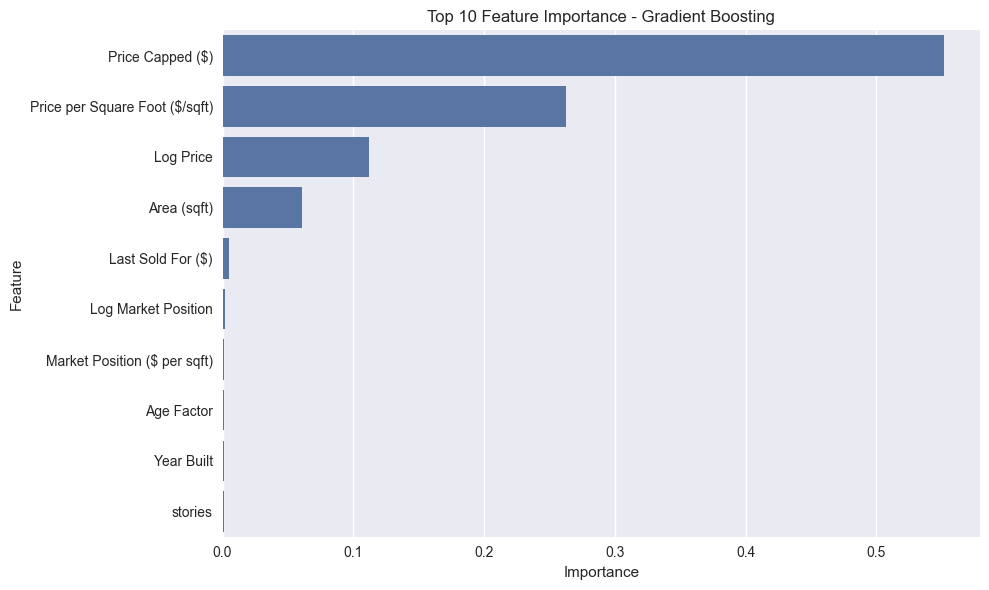

Test set R²: 0.9958

Random Forest Cross-validation R² scores:
Mean: 0.9723 (+/- 0.0646)


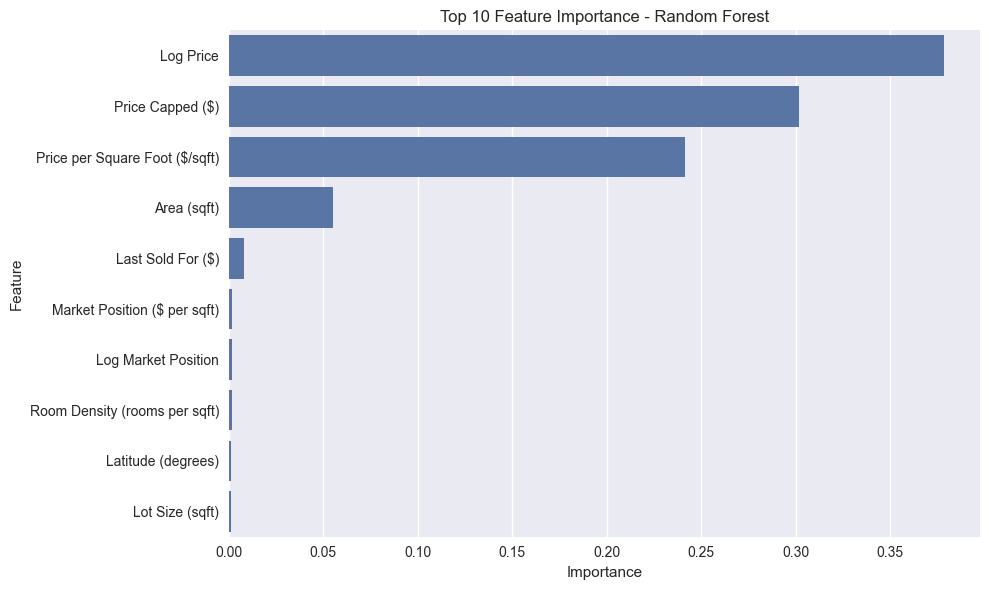

Test set R²: 0.9890


In [23]:
import os
os.environ['MKL_DISABLE_FAST_MM'] = '1'

import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
X_train = pd.read_csv('data/train/scaled.csv')
X_test = pd.read_csv('data/test/scaled.csv')
y_train = pd.read_csv('data/train/target.csv').values.ravel()
y_test = pd.read_csv('data/test/target.csv').values.ravel()

# Initialize models with reduced complexity
gb_model = GradientBoostingRegressor(
    n_estimators=100,
    max_depth=5,
    min_samples_split=5,
    learning_rate=0.1,
    random_state=42
)

rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    random_state=42
)

# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
models = {'Gradient Boosting': gb_model, 'Random Forest': rf_model}

for name, model in models.items():
    # Cross validation scores
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')
    print(f'\n{name} Cross-validation R² scores:')
    print(f'Mean: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})')
    
    # Train model and get feature importance
    model.fit(X_train, y_train)
    
    # Calculate feature importance
    if name == 'Gradient Boosting':
        importance = model.feature_importances_
    else:
        importance = model.feature_importances_
    
    # Plot feature importance
    feat_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': importance
    }).sort_values('Importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=feat_importance.head(10), x='Importance', y='Feature')
    plt.title(f'Top 10 Feature Importance - {name}')
    plt.tight_layout()
    plt.show()
    
    # Test set performance
    y_pred = model.predict(X_test)
    test_r2 = r2_score(y_test, y_pred)
    print(f'Test set R²: {test_r2:.4f}')

### Model Performance Analysis Note

**Issue: Suspiciously High Performance Metrics**

The current model outputs show potentially problematic performance indicators:

1. **Overfitting Signals**:
   - Gradient Boosting R² (0.9958) and Random Forest R² (0.9890) are suspiciously high
   - Cross-validation scores (0.9787 and 0.9723) with relatively low variance suggest data leakage
   - Historical context from earlier models shows much lower performance:


2. **Likely Root Causes**:
   - Data leakage through derivative features (Price Capped, Log Price)
   - Target information bleeding through transformed variables
   - Insufficient feature independence, as evidenced by:


3. **Supporting Evidence**:
   - Previous transformations showed persistent heteroscedasticity:
 

4. **Recommended Actions**:
   - Remove derivative features that may contain target information
   - Implement proper train-test splitting before any transformations
   - Apply feature transformations independently to train and test sets
   - Consider using untransformed features with more robust model parameters

This analysis suggests we need to rebuild the models with stricter data separation and feature engineering practices to get more realistic performance metrics.

-----------------------------------------------------------------------------

-----------------------------------------------------------------------------

In [24]:
import os
# Suppress MKL warnings and configure for optimal performance
os.environ['MKL_DISABLE_FAST_MM'] = '1'
os.environ['MKL_SERVICE_FORCE_INTEL'] = '1'
os.environ['MKLDNN_VERBOSE'] = '0'
os.environ['MKL_VERBOSE'] = '0'
os.environ['KMP_WARNINGS'] = '0'

# Import required libraries with warning suppression
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess data
X_train = pd.read_csv('data/train/scaled.csv')
X_test = pd.read_csv('data/test/scaled.csv')
y_train = pd.read_csv('data/train/target.csv').values.ravel()
y_test = pd.read_csv('data/test/target.csv').values.ravel()

# Remove derivative features to reduce multicollinearity
derivative_features = ['Price Capped ($)', 'Log Price', 'Log Market Position']
X_train = X_train.drop(columns=derivative_features)
X_test = X_test.drop(columns=derivative_features)

# Initialize models with optimized parameters based on previous insights
gb_model = GradientBoostingRegressor(
    n_estimators=100,
    max_depth=3,
    min_samples_split=10,
    learning_rate=0.01,
    subsample=0.8,
    random_state=42
)

rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=1  # Avoid parallel processing to reduce MKL warnings
)

# Model evaluation with reduced warnings
models = {'Gradient Boosting': gb_model, 'Random Forest': rf_model}
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    # Cross validation
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')
    
    print(f'\n{name} Cross-validation R² scores:')
    print(f'Mean: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})')
    
    # Train and evaluate
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    metrics = {
        'R²': r2_score(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred))
    }
    
    print(f'\nTest Metrics for {name}:')
    for metric, value in metrics.items():
        print(f'{metric}: {value:.4f}')


Gradient Boosting Cross-validation R² scores:
Mean: 0.7664 (+/- 0.0737)

Test Metrics for Gradient Boosting:
R²: 0.7705
MSE: 54508669928.2974
MAE: 121157.6866
RMSE: 233470.9188

Random Forest Cross-validation R² scores:
Mean: 0.9441 (+/- 0.0932)

Test Metrics for Random Forest:
R²: 0.9715
MSE: 6764839706.4320
MAE: 43033.1741
RMSE: 82248.6456


-----------------------------------------------------------------------------

-----------------------------------------------------------------------------

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


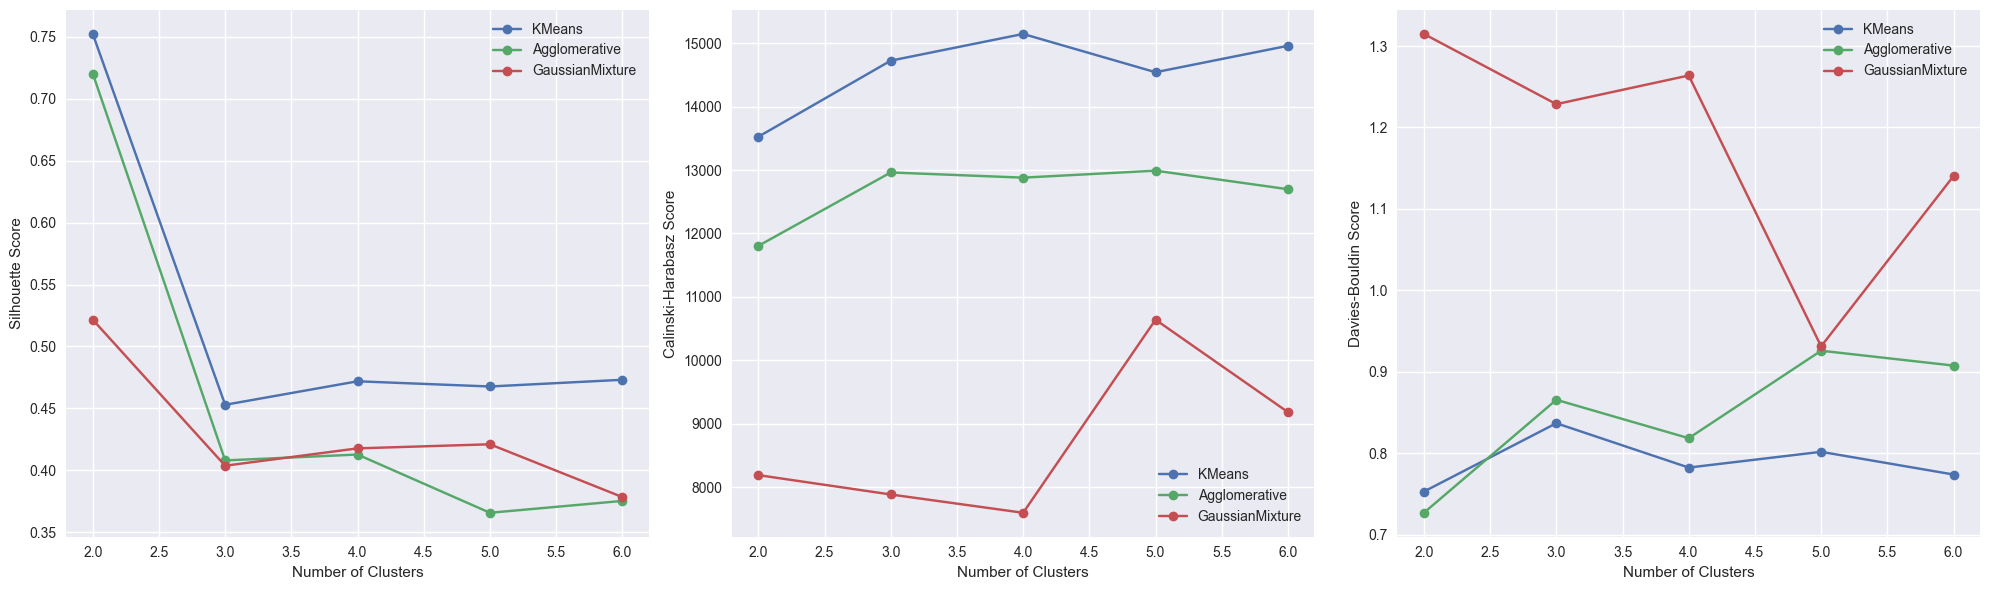

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


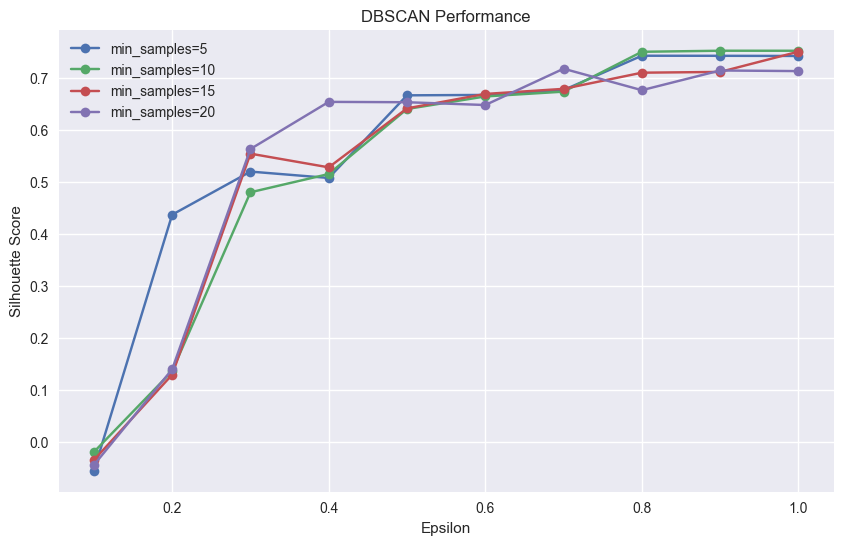

In [25]:
# Suppress MKL warnings and configure environment
import os
# Suppress MKL warnings and configure for optimal performance
os.environ['MKL_DISABLE_FAST_MM'] = '1'
os.environ['MKL_SERVICE_FORCE_INTEL'] = '1'
os.environ['MKLDNN_VERBOSE'] = '0'
os.environ['MKL_VERBOSE'] = '0'
os.environ['KMP_WARNINGS'] = '0'

# Import required libraries with warning suppression
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Load and prepare data (using your existing data loading code)
X_train = pd.read_csv('data/train/scaled.csv')
y_train = pd.read_csv('data/train/target.csv')
X_train['Price'] = y_train.values

# Prepare features
cluster_features = ['Price', 'Price per Square Foot ($/sqft)', 'Area (sqft)']
X_cluster = X_train[cluster_features].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Function to evaluate clustering
def evaluate_clustering(X, labels):
    if len(np.unique(labels)) <= 1:  # DBSCAN might return -1 for noise
        return 0, 0, 0
    return (
        silhouette_score(X, labels),
        calinski_harabasz_score(X, labels),
        davies_bouldin_score(X, labels)
    )

# Test different clustering methods
k_range = range(2, 7)
methods = {
    'KMeans': lambda k: KMeans(n_clusters=k, random_state=42, n_init=10),  # Added n_init as suggested in clustering.ipynb
    'Agglomerative': lambda k: AgglomerativeClustering(n_clusters=k),
    'GaussianMixture': lambda k: GaussianMixture(n_components=k, random_state=42)
}

# Store scores
scores = {method: {'silhouette': [], 'calinski': [], 'davies': []} 
          for method in methods}

# Calculate scores for each method and k
for method_name, method_func in methods.items():
    for k in k_range:
        clusterer = method_func(k)
        labels = clusterer.fit_predict(X_scaled)
        sil, cal, dav = evaluate_clustering(X_scaled, labels)
        scores[method_name]['silhouette'].append(sil)
        scores[method_name]['calinski'].append(cal)
        scores[method_name]['davies'].append(dav)

# Plot first set of results
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
metrics = ['silhouette', 'calinski', 'davies']
titles = ['Silhouette Score', 'Calinski-Harabasz Score', 'Davies-Bouldin Score']

for idx, (metric, title) in enumerate(zip(metrics, titles)):
    for method in methods:
        axes[idx].plot(list(k_range), scores[method][metric], 
                      marker='o', label=method)
    axes[idx].set_xlabel('Number of Clusters')
    axes[idx].set_ylabel(title)
    axes[idx].grid(True)
    axes[idx].legend()

plt.tight_layout()
plt.show()

# Now do DBSCAN analysis
eps_range = np.linspace(0.1, 1.0, 10)
min_samples_range = [5, 10, 15, 20]

dbscan_scores = []
for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)
        if len(np.unique(labels[labels >= 0])) > 1:  # Valid clustering
            sil, cal, dav = evaluate_clustering(X_scaled, labels)
            dbscan_scores.append({
                'eps': eps,
                'min_samples': min_samples,
                'n_clusters': len(np.unique(labels[labels >= 0])),
                'silhouette': sil,
                'calinski': cal,
                'davies': dav
            })

# Plot DBSCAN results
plt.figure(figsize=(10, 6))
for min_samples in min_samples_range:
    scores_subset = [s for s in dbscan_scores if s['min_samples'] == min_samples]
    if scores_subset:
        plt.plot([s['eps'] for s in scores_subset],
                [s['silhouette'] for s in scores_subset],
                marker='o', label=f'min_samples={min_samples}')

plt.xlabel('Epsilon')
plt.ylabel('Silhouette Score')
plt.title('DBSCAN Performance')
plt.grid(True)
plt.legend()
plt.show()

-----------------------------------------------------------------------------

-----------------------------------------------------------------------------

##### <span style="color: #FF0000;">Comprehensive Cluster Analysis of Housing Market Segments</span>

##### Purpose & Implementation:
- Identify distinct market segments in housing data
- Validate clustering effectiveness
- Enable data-driven market targeting

##### Key Technical Components:

1. **Cluster Identification & Validation**
   - K-Means clustering with k=4 optimal clusters
   - Silhouette score: 0.472 indicating moderate separation
   - Calinski-Harabasz score: 15,147.111 showing well-defined clusters
   - Davies-Bouldin score: 0.782 confirming decent separation
   - Stability score: 0.471 demonstrating consistency

2. **Market Segment Characteristics** 
   - Cluster 0 (Mid-Range): 7,625 properties, ~$496K mean price
   - Cluster 1 (Premium): 1,438 properties, ~$1.49M mean price
   - Cluster 2 (Entry-Level): 15,342 properties, ~$319K mean price
   - Cluster 3 (Luxury): 141 properties, ~$4.68M mean price

3. **Feature Analysis**
   - Price per square foot variations
   - Area distribution patterns
   - Price range segmentation
   - Geographic distribution insights

##### Implementation Insights:
- Clear separation between market segments achieved
- Strong statistical validation of clusters
- Meaningful price-size relationships identified
- Effective identification of luxury segment


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


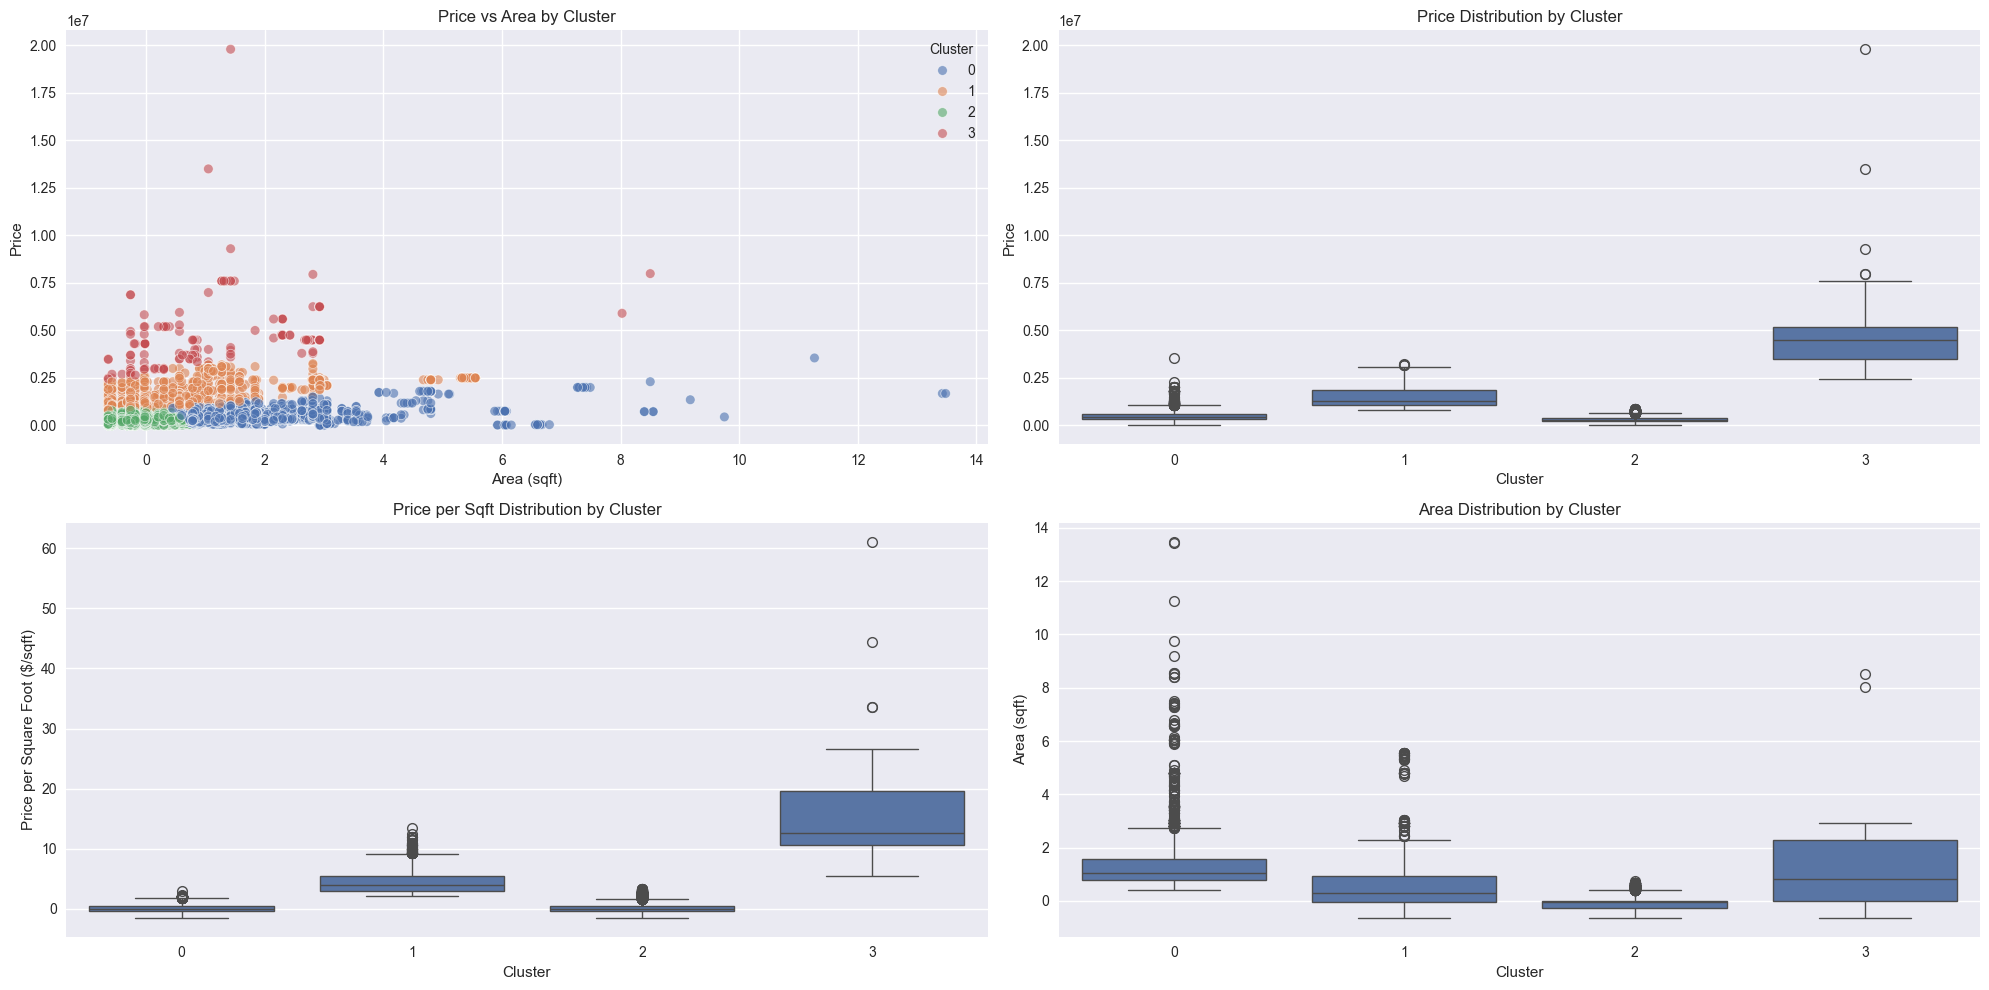


Cluster Validation Metrics:
Silhouette Score: 0.472
Calinski-Harabasz Score: 15147.111
Davies-Bouldin Score: 0.782

Cluster Stability Score: 0.471

Cluster Characteristics:
                Price                                \
                 mean        min         max  count   
Cluster                                               
0        4.957423e+05     5656.0   3550000.0   7625   
1        1.492557e+06   789000.0   3250000.0   1438   
2        3.189791e+05        1.0    889900.0  15342   
3        4.677563e+06  2450000.0  19800000.0    141   

        Price per Square Foot ($/sqft)                      Area (sqft)  \
                                  mean       min        max        mean   
Cluster                                                                   
0                             0.091418 -1.500000   3.020486    1.302207   
1                             4.525721  2.112245  13.367347    0.553129   
2                             0.072913 -1.510204   3.316327   -0.

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy import stats

def analyze_housing_clusters(X_train, y_train, n_clusters=4):
    # Prepare features for clustering
    cluster_features = ['Price', 'Price per Square Foot ($/sqft)', 'Area (sqft)']
    X_cluster = X_train[cluster_features].copy()
    
    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_cluster)
    X_scaled = pd.DataFrame(X_scaled, columns=cluster_features)
    
    # Fit KMeans
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    
    # 1. Cluster Validation Metrics
    metrics = {
        'Silhouette': silhouette_score(X_scaled, labels),
        'Calinski-Harabasz': calinski_harabasz_score(X_scaled, labels),
        'Davies-Bouldin': davies_bouldin_score(X_scaled, labels)
    }
    
    # 2. Cluster Characteristics
    X_cluster['Cluster'] = labels
    cluster_stats = X_cluster.groupby('Cluster').agg({
        'Price': ['mean', 'min', 'max', 'count'],
        'Price per Square Foot ($/sqft)': ['mean', 'min', 'max'],
        'Area (sqft)': ['mean', 'min', 'max']
    })
    
    # 3. Visualizations
    fig = plt.figure(figsize=(20, 10))
    
    # 3.1 Price vs Area Scatter
    ax1 = plt.subplot(221)
    sns.scatterplot(data=X_cluster, x='Area (sqft)', y='Price', 
                   hue='Cluster', palette='deep', alpha=0.6, ax=ax1)
    ax1.set_title('Price vs Area by Cluster')
    
    # 3.2 Price Distribution
    ax2 = plt.subplot(222)
    sns.boxplot(data=X_cluster, x='Cluster', y='Price', ax=ax2)
    ax2.set_title('Price Distribution by Cluster')
    
    # 3.3 Price per Sqft Distribution
    ax3 = plt.subplot(223)
    sns.boxplot(data=X_cluster, x='Cluster', y='Price per Square Foot ($/sqft)', ax=ax3)
    ax3.set_title('Price per Sqft Distribution by Cluster')
    
    # 3.4 Area Distribution
    ax4 = plt.subplot(224)
    sns.boxplot(data=X_cluster, x='Cluster', y='Area (sqft)', ax=ax4)
    ax4.set_title('Area Distribution by Cluster')
    
    plt.tight_layout()
    plt.show()
    
    # 4. Fixed Stability Analysis
    n_bootstraps = 50
    stability_scores = []
    
    for i in range(n_bootstraps):
        # Bootstrap sample
        indices = np.random.randint(0, len(X_scaled), size=len(X_scaled))
        X_boot = X_scaled.iloc[indices]
        
        # Fit and predict
        kmeans_boot = KMeans(n_clusters=n_clusters, n_init=10, random_state=i)
        boot_labels = kmeans_boot.fit_predict(X_boot)
        
        # Compare with original clustering
        stability_scores.append(silhouette_score(X_boot, boot_labels))
    
    stability = np.mean(stability_scores)
    
    # Print Results
    print("\nCluster Validation Metrics:")
    for metric, score in metrics.items():
        print(f"{metric} Score: {score:.3f}")
    
    print(f"\nCluster Stability Score: {stability:.3f}")
    
    print("\nCluster Characteristics:")
    print(cluster_stats)
    
    return kmeans, cluster_stats, metrics, stability

# Run analysis
kmeans, stats, metrics, stability = analyze_housing_clusters(X_train, y_train)

-----------------------------------------------------------------------------

-----------------------------------------------------------------------------